In [1]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import cross_val_score
from scipy.stats import uniform, randint

from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import rc, font_manager
rc('font',family="NanumSquareR")
from datetime import datetime
import os
from sklearn.linear_model import LinearRegression
import scipy.stats as st
#-*- coding: utf-8 -*-
from tqdm import tqdm

In [231]:
agg={}
for i in train['Census_OSUILocaleIdentifier'].unique():
    if (train['Census_OSUILocaleIdentifier']==i).mean()<0.004:
        agg[i]='other'
    else:
        agg[i]=i

In [232]:
a=train['Census_OSUILocaleIdentifier'].map(agg)

In [233]:
a.value_counts()/len(a)

31       0.355414
34       0.116577
30       0.057613
125      0.055847
49       0.048948
158      0.045746
35       0.042266
119      0.037885
other    0.029707
26       0.028343
148      0.023186
160      0.022640
72       0.021513
83       0.019131
109      0.015970
115      0.014881
120      0.012197
74       0.009467
64       0.009463
5        0.009174
20       0.008146
28       0.005694
140      0.005485
58       0.004707
Name: Census_OSUILocaleIdentifier, dtype: float64

In [ ]:
def naively_encode_categorical_var(train=train,test=test)

In [220]:
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage(deep=True).sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage(deep=True).sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [221]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = [c for c,v in dtypes.items() if v in numerics]
categorical_columns = [c for c,v in dtypes.items() if v not in numerics]

In [222]:
%%time
os.chdir("C:\\Users\\PC\\Documents\\마이크로소프트")
train = pd.read_csv('train.csv', dtype=dtypes)

Wall time: 9min 19s


In [5]:
os.chdir("C:\\Users\\PC\\Documents\\마이크로소프트")
k=pd.read_csv("all_variables_first_lower.csv")

In [7]:
k['HasDetections']=k['HasDetections']-0.02

In [8]:
k.to_csv("all_variables_first_lower.csv",index=False)

In [223]:
del dtypes['HasDetections']
test = pd.read_csv('test.csv', dtype=dtypes)

In [7]:
train = reduce_mem_usage(train)
test = reduce_mem_usage(test)

Mem. usage decreased to 2363.03 Mb (0.0% reduction)
Mem. usage decreased to 2111.09 Mb (0.0% reduction)


In [7]:
stats = []
for col in train.columns:
    stats.append((col, train[col].nunique(), train[col].isnull().sum() * 100 / train.shape[0], train[col].value_counts(normalize=True, dropna=False).values[0] * 100, train[col].dtype))
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
stats_df.sort_values('Percentage of missing values', ascending=False)

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
28,PuaMode,2,99.974119,99.974119,category
41,Census_ProcessorClass,3,99.589407,99.589407,category
8,DefaultBrowsersIdentifier,1730,95.141637,95.141637,float16
68,Census_IsFlightingInternal,2,83.044030,83.044030,float16
52,Census_InternalBatteryType,78,71.046809,71.046809,category
71,Census_ThresholdOptIn,2,63.524472,63.524472,float16
75,Census_IsWIMBootEnabled,2,63.439038,63.439038,float16
31,SmartScreen,21,35.610795,48.379658,category
15,OrganizationIdentifier,49,30.841487,47.037662,float16
29,SMode,2,6.027686,93.928812,float16


Some variables like PuaMode have too much NA values, so we will drop 

In [8]:
categorical_variables=[]
for i in test.columns:
    if (train[i].isnull().mean()<0.95)&(train[i].isnull().mean()>0.05) &(test[i].isnull().mean()<0.95)&(test[i].isnull().mean()>0.05):
        train["is_null"+i]=train[i].isnull().astype(int)
        test["is_null"+i]=test[i].isnull().astype(int)

In [9]:
[x for x in train.columns if 'is_null' in x]

['is_nullOrganizationIdentifier',
 'is_nullSMode',
 'is_nullSmartScreen',
 'is_nullCensus_InternalBatteryType',
 'is_nullCensus_IsFlightingInternal',
 'is_nullCensus_ThresholdOptIn',
 'is_nullCensus_IsWIMBootEnabled']

In [10]:
def draw_categorical(i):
    print(train[i].value_counts().head())
    f,ax=plt.subplots(1,2,figsize=(10,5))
    train[[i,'HasDetections']].groupby([i]).mean().plot.bar(ax=ax[0])
    ax[0].set_title('HasDetections vs '+i)
    sns.countplot(i,hue='HasDetections',data=train,ax=ax[1])
    ax[1].set_title(i+':not found vs found')
    plt.show()

0    6169965
1    2751518
Name: is_nullOrganizationIdentifier, dtype: int64


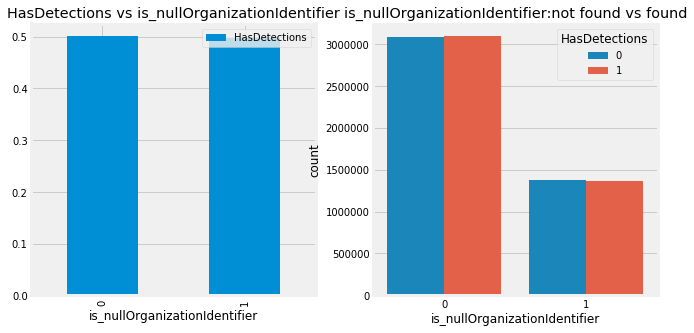

0    8383724
1     537759
Name: is_nullSMode, dtype: int64


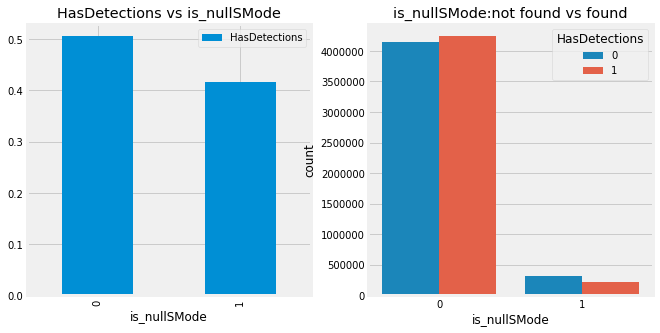

0    5744472
1    3177011
Name: is_nullSmartScreen, dtype: int64


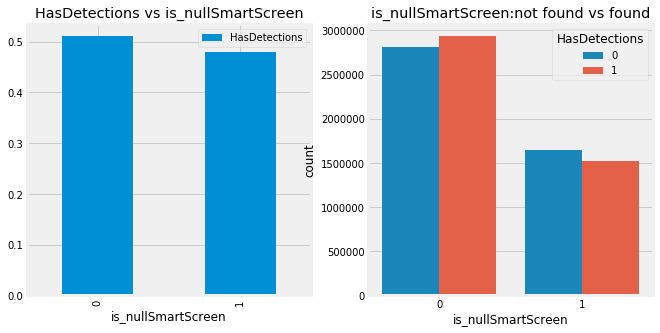

1    6338429
0    2583054
Name: is_nullCensus_InternalBatteryType, dtype: int64


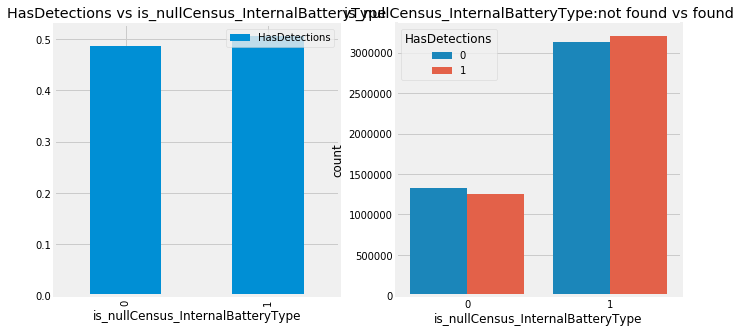

1    7408759
0    1512724
Name: is_nullCensus_IsFlightingInternal, dtype: int64


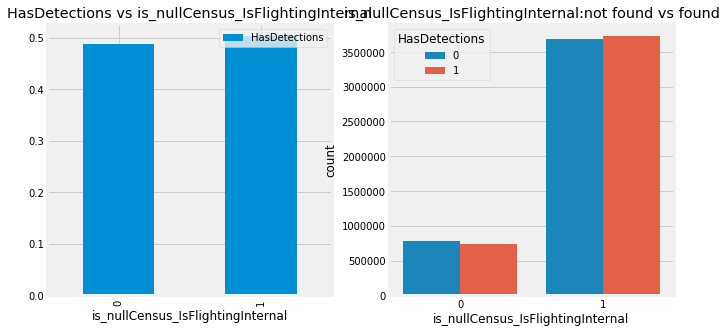

1    5667325
0    3254158
Name: is_nullCensus_ThresholdOptIn, dtype: int64


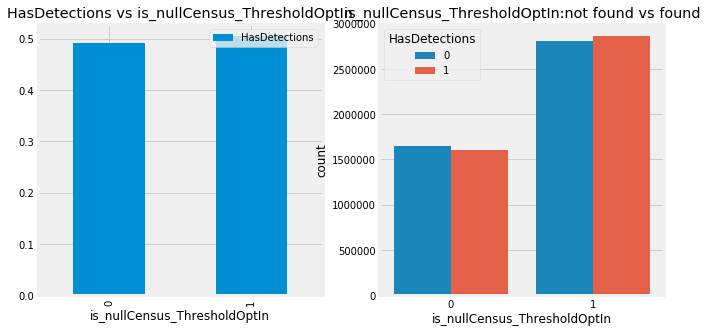

1    5659703
0    3261780
Name: is_nullCensus_IsWIMBootEnabled, dtype: int64


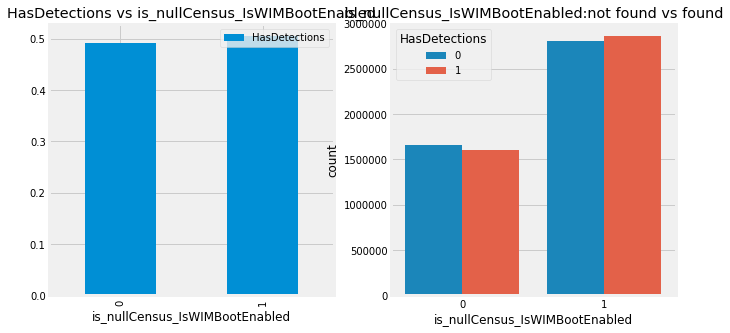

In [11]:
draw_categorical('is_nullOrganizationIdentifier')
draw_categorical('is_nullSMode')
draw_categorical('is_nullSmartScreen')
draw_categorical('is_nullCensus_InternalBatteryType')
draw_categorical('is_nullCensus_IsFlightingInternal')
draw_categorical('is_nullCensus_ThresholdOptIn')
draw_categorical('is_nullCensus_IsWIMBootEnabled')

Among the is_null variables, 'is_nullSMode' seems significant

In [11]:
#isnull_var=[x for x in train.columns if 'is_null' in x]
#for i in range(len(isnull_var)):
#    for j in range(i+1,len(isnull_var)):
#        print(train[isnull_var[i]].corr(train[isnull_var[j]]))

In [12]:
good_cols = list(train.columns)
for col in train.columns:
    rate = train[col].value_counts(normalize=True, dropna=False).values[0]
    if (rate > 0.9) & (col!='is_nullSMode'):
        good_cols.remove(col)

In [13]:
train = train[good_cols]
good_cols.remove('HasDetections')
test = test[good_cols]

In [14]:
train.head(5)

,MachineIdentifier,EngineVersion,AppVersion,AvSigVersion,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,...,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,is_nullOrganizationIdentifier,is_nullSMode,is_nullSmartScreen,is_nullCensus_InternalBatteryType,is_nullCensus_IsFlightingInternal,is_nullCensus_ThresholdOptIn,is_nullCensus_IsWIMBootEnabled
0,0000028988387b115f69f31a3bf04f09,1.1.15100.1,4.18.1807.18075,1.273.1735.0,53447.0,1.0,29,128035.0,18.0,35.0,...,0.0,10.0,0,0,0,1,1,1,1,1
1,000007535c3f730efa9ea0b7ef1bd645,1.1.14600.4,4.13.17134.1,1.263.48.0,53447.0,1.0,93,1482.0,18.0,119.0,...,0.0,8.0,0,0,0,1,1,1,1,1
2,000007905a28d863f6d0d597892cd692,1.1.15100.1,4.18.1807.18075,1.273.1341.0,53447.0,1.0,86,153579.0,18.0,64.0,...,0.0,3.0,0,0,0,0,1,1,1,1
3,00000b11598a75ea8ba1beea8459149f,1.1.15100.1,4.18.1807.18075,1.273.1527.0,53447.0,1.0,88,20710.0,NaN,117.0,...,0.0,3.0,1,1,0,0,1,1,1,1
4,000014a5f00daa18e76b81417eeb99fc,1.1.15100.1,4.18.1807.18075,1.273.1379.0,53447.0,1.0,18,37376.0,NaN,277.0,...,0.0,1.0,1,1,0,0,0,0,0,0


# EngineVersion

In [15]:
train['EngineVersion'].head()

0    1.1.15100.1
1    1.1.14600.4
2    1.1.15100.1
3    1.1.15100.1
4    1.1.15100.1
Name: EngineVersion, dtype: category
Categories (70, object): [1.1.12805.0, 1.1.12902.0, 1.1.13000.0, 1.1.13103.0, ..., 1.1.11202.0, 1.1.11104.0, 1.1.12802.0, 1.1.10701.0]

In [16]:
print(train['EngineVersion'].astype(str).str.split('.').apply(lambda x: x[0]).value_counts())
print(train['EngineVersion'].astype(str).str.split('.').apply(lambda x: x[1]).value_counts())

1    8921483
Name: EngineVersion, dtype: int64
1    8921483
Name: EngineVersion, dtype: int64


As you can see, the first two digits in variable EngineVersion seems useless, because they are all 1.
So we extract only the last two digits in the variable

In [17]:
train['EngineVersion']=train['EngineVersion'].astype(str).str.split(".").apply(lambda x: x[2]+"."+x[3]).astype(float)
test['EngineVersion']=test['EngineVersion'].astype(str).str.split(".").apply(lambda x: x[2]+"."+x[3]).astype(float)

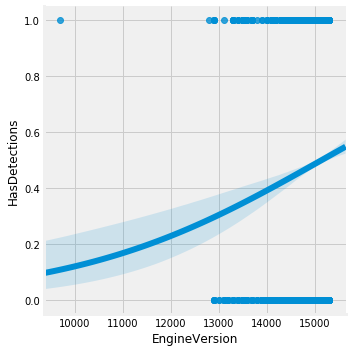

In [18]:
sns.lmplot('EngineVersion','HasDetections',data=train.sample(10000),logistic=True)

As EngineVersion goes up, more malware is successfully detected.(expected results)

Let's pull out only the last digit in EngineVersion

In [19]:
train['EngineVersion2']=train['EngineVersion'].astype(str).str.split('.').apply(lambda x: x[1]).astype(int)
test['EngineVersion2']=test['EngineVersion'].astype(str).str.split('.').apply(lambda x: x[1]).astype(int)

1    7524425
4     374098
2     301838
0     300044
5     161348
Name: EngineVersion2, dtype: int64


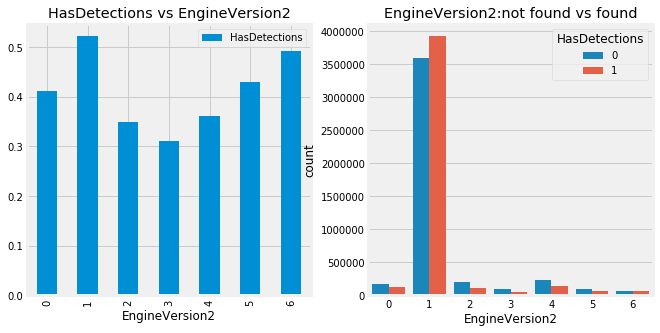

In [20]:
draw_categorical('EngineVersion2')

# AppVersion

Similar to EngineVersion, get rid of the first digits of AppVersion.

In [21]:
train['AppVersion3']=train['AppVersion'].astype(str).str.split('.').apply(lambda x: x[3]).astype(float)
test['AppVersion3']=test['AppVersion'].astype(str).str.split('.').apply(lambda x: x[3]).astype(float)

train['AppVersion']=train['AppVersion'].astype(str).str.split('.').apply(lambda x: x[1]+"."+x[2]).astype(float)
test['AppVersion']=test['AppVersion'].astype(str).str.split('.').apply(lambda x: x[1]+"."+x[2]).astype(float)

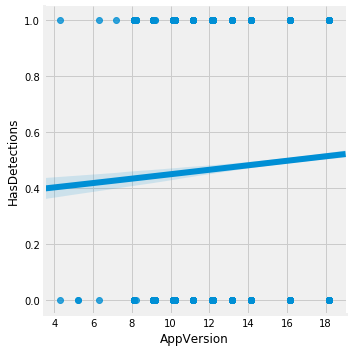

In [22]:
sns.lmplot('AppVersion','HasDetections',data=train.sample(10000),logistic=True)

In [23]:
train['AppVersion2']=train['AppVersion'].astype(str).str.split('.').apply(lambda x: x[1]).astype(int)
test['AppVersion2']=test['AppVersion'].astype(str).str.split('.').apply(lambda x: x[1]).astype(int)

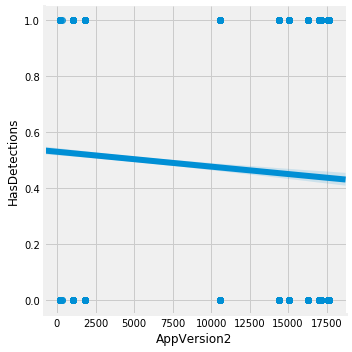

In [24]:
sns.lmplot('AppVersion2','HasDetections',data=train.sample(10000),logistic=True)

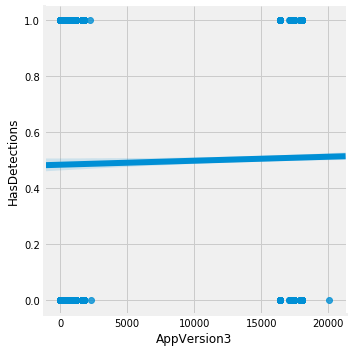

In [25]:
sns.lmplot('AppVersion3','HasDetections',data=train.sample(10000),logistic=True)

# AvSigVersion

In [26]:
train['AvSigVersion']=train['AvSigVersion'].astype(str).str.split('.').apply(lambda x: x[1]+"."+x[2])#.astype(float)
test['AvSigVersion']=test['AvSigVersion'].astype(str).str.split('.').apply(lambda x: x[1]+"."+x[2])#.astype(float)

train['AvSigVersion']=np.where(train['AvSigVersion']=='2&#x17;3.1144','273.1144',train['AvSigVersion'])
test['AvSigVersion']=np.where(test['AvSigVersion']=='2&#x17;3.1144','273.1144',test['AvSigVersion'])

train['AvSigVersion']=train['AvSigVersion'].astype(float)
test['AvSigVersion']=test['AvSigVersion'].astype(float)

In [27]:
train['AvSigVersion2']=np.where(train['AvSigVersion'].isnull(),np.nan,train['AvSigVersion'].astype(str).str.split('.').apply(lambda x: x[1]).astype(int))
test['AvSigVersion2']=test['AvSigVersion'].astype(str).str.split('.').apply(lambda x: x[1]).astype(int)

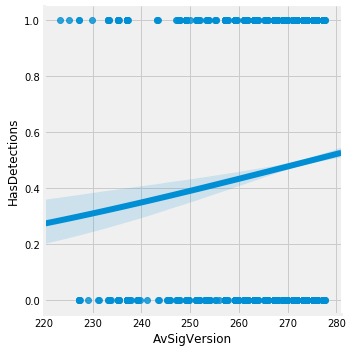

In [28]:
sns.lmplot('AvSigVersion','HasDetections',data=train.sample(10000),logistic=True)

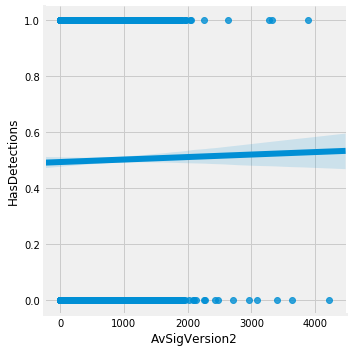

In [29]:
sns.lmplot('AvSigVersion2','HasDetections',data=train.sample(10000),logistic=True)

Both AvSigVersion, and AvSigVersion2 have positive correlation with the target

# AVProductStatesIdentifier	

In [30]:
train['AVProductStatesIdentifier'].value_counts(dropna=False).head()/len(train)

53447.0    0.652870
7945.0     0.053343
47238.0    0.036727
62773.0    0.029901
46413.0    0.012652
Name: AVProductStatesIdentifier, dtype: float64

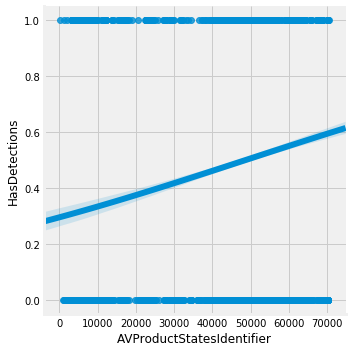

In [31]:
sns.lmplot('AVProductStatesIdentifier','HasDetections',data=train.sample(10000),logistic=True)

# AVProductsInstalled

In [32]:
train['AVProductsInstalled'].value_counts(dropna=False)/len(train)

 1.0    6.959485e-01
 2.0    2.756277e-01
 3.0    2.332605e-02
NaN     4.059975e-03
 4.0    9.815633e-04
 5.0    5.279391e-05
 6.0    3.138492e-06
 7.0    1.120890e-07
 0.0    1.120890e-07
Name: AVProductsInstalled, dtype: float64

1.0    6208893
2.0    2459008
3.0     208103
4.0       8757
5.0        471
Name: AVProductsInstalled, dtype: int64


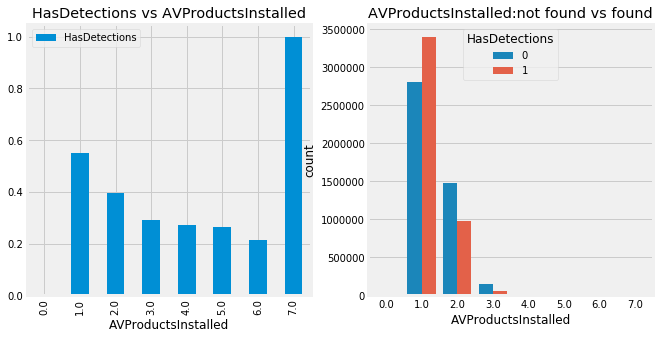

In [33]:
draw_categorical('AVProductsInstalled')

# CountryIdentifier

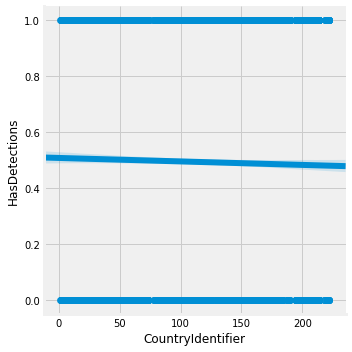

In [34]:
sns.lmplot('CountryIdentifier','HasDetections',data=train.sample(10000),logistic=True)

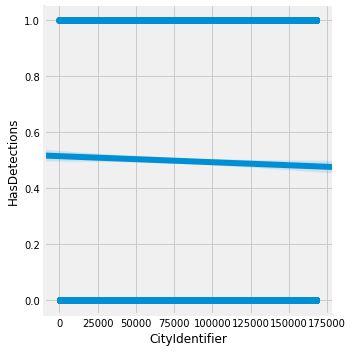

In [35]:
sns.lmplot('CityIdentifier','HasDetections',data=train.sample(10000),logistic=True)

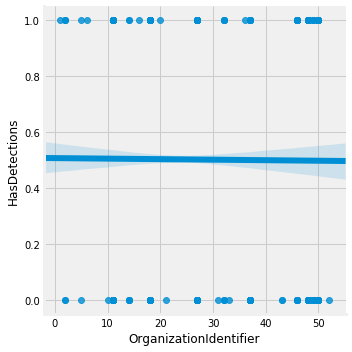

In [36]:
sns.lmplot('OrganizationIdentifier','HasDetections',data=train.sample(10000),logistic=True)

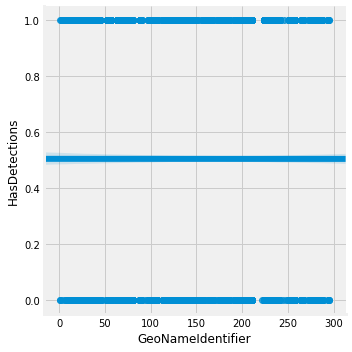

In [37]:
sns.lmplot('GeoNameIdentifier','HasDetections',data=train.sample(10000),logistic=True)

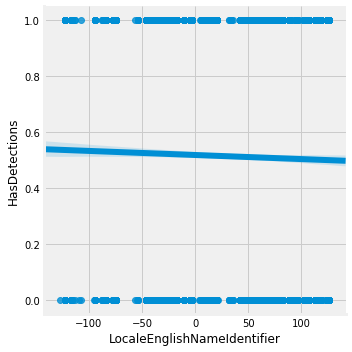

In [38]:
sns.lmplot('LocaleEnglishNameIdentifier','HasDetections',data=train.sample(10000),logistic=True)

no correlation between identifier variables and hasdetection. reasonable to consider all of them as categorical ones

In [39]:
print(train.CountryIdentifier.nunique())
print(train.CityIdentifier.nunique())
print(train.OrganizationIdentifier.nunique())
print(train.GeoNameIdentifier.nunique())
print(train.LocaleEnglishNameIdentifier.nunique())

print(test.CountryIdentifier.nunique())
print(test.CityIdentifier.nunique())
print(test.OrganizationIdentifier.nunique())
print(test.GeoNameIdentifier.nunique())
print(test.LocaleEnglishNameIdentifier.nunique())

222
107366
49
292
252
222
105817
50
289
253


In [40]:
train=train.drop(['CityIdentifier'],axis=1)
test=test.drop(['CityIdentifier'],axis=1)

In [41]:
agg={}
for i in train['OrganizationIdentifier'].unique():
    if (train['OrganizationIdentifier']==i).mean()<0.1:
        agg[i]='other'
    else:
        agg[i]=i
train['OrganizationIdentifier']=train['OrganizationIdentifier'].map(agg)
test['OrganizationIdentifier']=test['OrganizationIdentifier'].map(agg)
categorical_variables.append('OrganizationIdentifier')

In [42]:
agg={}
for i in train['GeoNameIdentifier'].unique():
    if (train['GeoNameIdentifier']==i).mean()<0.1:
        agg[i]='other'
    else:
        agg[i]=i
train['GeoNameIdentifier']=train['GeoNameIdentifier'].map(agg)
test['GeoNameIdentifier']=test['GeoNameIdentifier'].map(agg)
categorical_variables.append('GeoNameIdentifier')

In [43]:
agg={}
for i in train['LocaleEnglishNameIdentifier'].unique():
    if (train['LocaleEnglishNameIdentifier']==i).mean()<0.1:
        agg[i]='other'
    else:
        agg[i]=i
train['LocaleEnglishNameIdentifier']=train['LocaleEnglishNameIdentifier'].map(agg)
test['LocaleEnglishNameIdentifier']=test['LocaleEnglishNameIdentifier'].map(agg)
categorical_variables.append('LocaleEnglishNameIdentifier')

27.0     4196457
other    2960851
18.0     1764175
Name: OrganizationIdentifier, dtype: int64


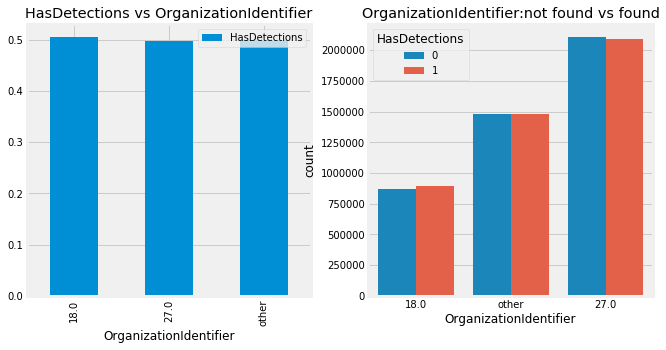

In [44]:
draw_categorical('OrganizationIdentifier')

Later, I'll do the frequency encoding on these variables

other    7389554
277.0    1531929
Name: GeoNameIdentifier, dtype: int64


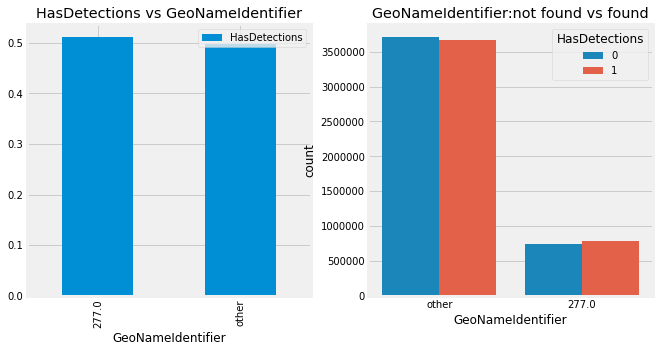

In [45]:
draw_categorical('GeoNameIdentifier')

other    6826898
75       2094585
Name: LocaleEnglishNameIdentifier, dtype: int64


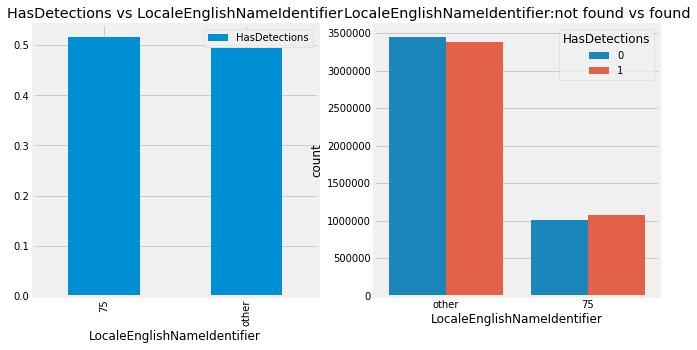

In [46]:
draw_categorical('LocaleEnglishNameIdentifier')

CountryIdentifier variables have too much unique values to do simple one hot encoding.
so let's reduce dimension by using fastica.

In [47]:
test['HasDetections']=np.nan
train_test=pd.concat([train,test],axis=0)
agg={}
for i in train_test['CountryIdentifier'].unique():
    agg[i]=(train_test['CountryIdentifier']==i).sum()

train_test['CountryIdentifier_count_encoding']=train_test['CountryIdentifier'].map(agg)
train_test=train_test.drop(['CountryIdentifier'],axis=1)

In [48]:
#a=pd.get_dummies(train_test,columns=['CountryIdentifier'])
#features=[i for i in a.columns if "CountryIdentifier" in i]
#from sklearn.decomposition import FastICA

#ica=FastICA(10, random_state=2019)
#ica_train_result=ica.fit_transform(a[features])

#for i in range(0,10):
#    a['pca_CountryIdentifier'+str(i)]=ica_train_result[:,i]

#for i in range(0,10):
#    print(a['pca_CountryIdentifier'+str(i)].corr(a['HasDetections']))

#for i in range(0,10):
#    train_test['pca_CountryIdentifier'+str(i)]=a['pca_CountryIdentifier'+str(i)]

In [49]:
#train_test.to_csv("train_test.csv",index=False)

In [50]:
train=train_test.loc[~train_test['HasDetections'].isnull(),]
test=train_test.loc[train_test['HasDetections'].isnull(),]

# OsBuild

In [51]:
train['OsBuild'].describe()

count    8.921483e+06
mean     1.571997e+04
std      2.190685e+03
min      7.600000e+03
25%      1.506300e+04
50%      1.629900e+04
75%      1.713400e+04
max      1.824400e+04
Name: OsBuild, dtype: float64

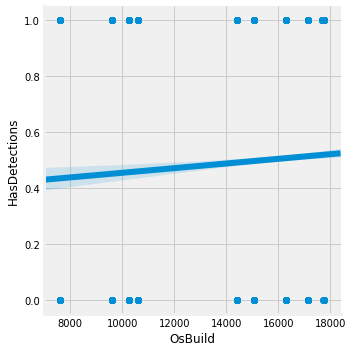

In [52]:
sns.lmplot('OsBuild','HasDetections',data=train.sample(10000),logistic=True)

# OsSuite

In [53]:
train['OsSuite'].value_counts()

768    5560661
256    3346251
272      12092
400        793
16         731
305        662
784        198
274         39
144         34
49          17
307          2
528          1
402          1
18           1
Name: OsSuite, dtype: int64

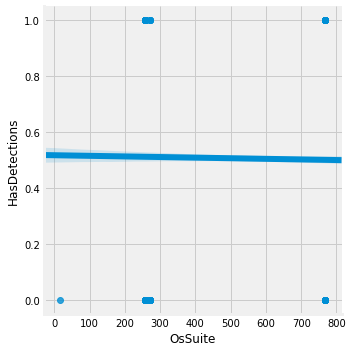

In [54]:
sns.lmplot('OsSuite','HasDetections',data=train.sample(10000),logistic=True)

# OsPlatformSubRelease and OsBuildLab

In [55]:
train['OsPlatformSubRelease'].value_counts()/len(train)

rs4           0.438887
rs3           0.280635
rs2           0.087460
rs1           0.081917
th2           0.046136
th1           0.030286
windows8.1    0.021802
windows7      0.010524
prers5        0.002353
Name: OsPlatformSubRelease, dtype: float64

rs4    3915526
rs3    2503681
rs2     780270
rs1     730819
th2     411606
Name: OsPlatformSubRelease, dtype: int64


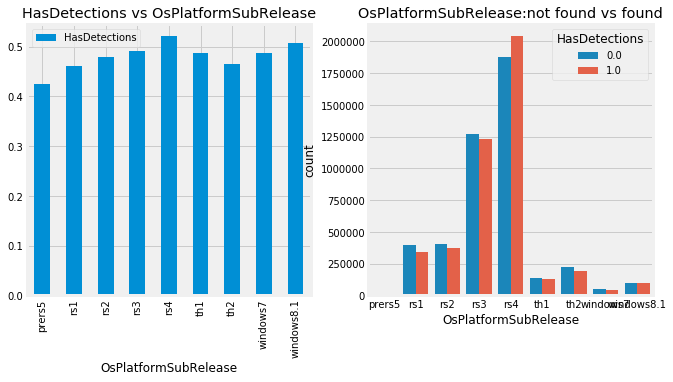

In [56]:
draw_categorical('OsPlatformSubRelease')

In [57]:
agg={}
for i in train['OsPlatformSubRelease'].unique():
    if (train['OsPlatformSubRelease']==i).mean()<0.05:
        agg[i]='other'
    else:
        agg[i]=i

In [58]:
train['OsPlatformSubRelease']=train['OsPlatformSubRelease'].map(agg)
test['OsPlatformSubRelease']=test['OsPlatformSubRelease'].map(agg)

In [59]:
categorical_variables.append('OsPlatformSubRelease')

In [60]:
def svc_or_not(OsBuildLab):
    if pd.Series(OsBuildLab).isnull().sum()>=1:
        return np.nan
    elif '_svc' in OsBuildLab:
        return 'svc'
    else:
        return 'other'
agg={}
for i in train['OsBuildLab'].unique():
    agg[i]=svc_or_not(i)
train['svc_or_not']=train['OsBuildLab'].map(agg)

agg={}
for i in test['OsBuildLab'].unique():
    agg[i]=svc_or_not(i)
test['svc_or_not']=test['OsBuildLab'].map(agg)
train=train.drop(['svc_or_not'],axis=1)
test=test.drop(['svc_or_not'],axis=1)

In [61]:
train['OsBuildLab'].fillna(train['OsBuildLab'].value_counts().keys()[0],inplace=True)
test['OsBuildLab'].fillna(test['OsBuildLab'].value_counts().keys()[0],inplace=True)

In [62]:
train['OsBuildLab2']=train['OsBuildLab'].str.split('.').apply(lambda x: x[0]+"."+x[1])#.astype(float)
test['OsBuildLab2']=test['OsBuildLab'].str.split('.').apply(lambda x: x[0]+"."+x[1])#.astype(float)
train['OsBuildLab2']=np.where(train['OsBuildLab2']=='17134.1*amd64fre','17134.1',train['OsBuildLab2']).astype(float)
test['OsBuildLab2']=np.where(test['OsBuildLab2']=='17134.1*amd64fre','17134.1',test['OsBuildLab2']).astype(float)

In [63]:
train['OsBuildLab2']=train['OsBuildLab2'].astype(str).str.split('.').apply(lambda x:x[1])
test['OsBuildLab2']=test['OsBuildLab2'].astype(str).str.split('.').apply(lambda x:x[1])
train['OsBuildLab2']=train['OsBuildLab2'].astype(str).str.slice(0,1).astype(int)
test['OsBuildLab2']=test['OsBuildLab2'].astype(str).str.slice(0,1).astype(int)

In [64]:
train=train.drop(['OsBuildLab'],axis=1)
test=test.drop(['OsBuildLab'],axis=1)

In [65]:
pd.set_option('display.max_columns',100)
train.head(10)

,AVProductStatesIdentifier,AVProductsInstalled,AppVersion,AppVersion2,AppVersion3,AvSigVersion,AvSigVersion2,Census_ActivationChannel,Census_ChassisTypeName,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_GenuineStateName,Census_InternalBatteryNumberOfCharges,Census_InternalBatteryType,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_IsFlightingInternal,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Census_IsWIMBootEnabled,Census_MDC2FormFactor,Census_OEMModelIdentifier,Census_OEMNameIdentifier,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSInstallLanguageIdentifier,Census_OSInstallTypeName,Census_OSSkuName,Census_OSUILocaleIdentifier,Census_OSVersion,Census_OSWUAutoUpdateOptionsName,Census_PowerPlatformRoleName,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_SystemVolumeTotalCapacity,Census_ThresholdOptIn,Census_TotalPhysicalRAM,EngineVersion,EngineVersion2,GeoNameIdentifier,HasDetections,IeVerIdentifier,LocaleEnglishNameIdentifier,MachineIdentifier,OrganizationIdentifier,OsBuild,OsPlatformSubRelease,OsSuite,SkuEdition,SmartScreen,Wdft_IsGamer,Wdft_RegionIdentifier,is_nullCensus_InternalBatteryType,is_nullCensus_IsFlightingInternal,is_nullCensus_IsWIMBootEnabled,is_nullCensus_ThresholdOptIn,is_nullOrganizationIdentifier,is_nullSMode,is_nullSmartScreen,CountryIdentifier_count_encoding,OsBuildLab2
0,53447.0,1.0,18.18070,1807,18075.0,273.1735,1735.0,Retail,Desktop,628.0,36144.0,IS_GENUINE,4.294967e+09,NaN,18.906250,1440.0,900.0,NaN,0,0,NaN,Desktop,9124.0,2668.0,rs4_release,17134,165,Professional,26.0,UUPUpgrade,PROFESSIONAL,119,10.0.17134.165,UNKNOWN,Desktop,476940.0,HDD,4.0,5.0,2340.0,299451.0,NaN,4096.0,15100.1,1,other,0.0,137.0,other,0000028988387b115f69f31a3bf04f09,18,17134,rs4,256,Pro,NaN,0.0,10.0,1,1,1,1,0,0,1,647634,1
1,53447.0,1.0,13.17134,17134,1.0,263.4800,48.0,Retail,Notebook,628.0,57858.0,OFFLINE,1.000000e+00,NaN,13.898438,1366.0,768.0,NaN,0,0,NaN,Notebook,91656.0,2668.0,rs4_release,17134,1,Professional,8.0,IBSClean,PROFESSIONAL,31,10.0.17134.1,UNKNOWN,Mobile,476940.0,HDD,4.0,5.0,2404.0,102385.0,NaN,4096.0,14600.4,4,other,0.0,137.0,other,000007535c3f730efa9ea0b7ef1bd645,18,17134,rs4,256,Pro,NaN,0.0,8.0,1,1,1,1,0,0,1,520839,1
2,53447.0,1.0,18.18070,1807,18075.0,273.1341,1341.0,OEM:NONSLP,Desktop,142.0,52682.0,IS_GENUINE,4.294967e+09,NaN,21.500000,1920.0,1080.0,NaN,0,0,NaN,Desktop,317701.0,4908.0,rs4_release,17134,165,Core,7.0,UUPUpgrade,CORE,30,10.0.17134.165,FullAuto,Desktop,114473.0,SSD,4.0,5.0,1972.0,113907.0,NaN,4096.0,15100.1,1,other,0.0,137.0,other,000007905a28d863f6d0d597892cd692,18,17134,rs4,768,Home,RequireAdmin,0.0,3.0,1,1,1,1,0,0,0,76175,1
3,53447.0,1.0,18.18070,1807,18075.0,273.1527,1527.0,OEM:NONSLP,MiniTower,355.0,20050.0,IS_GENUINE,4.294967e+09,NaN,18.500000,1366.0,768.0,NaN,0,0,NaN,Desktop,275890.0,1443.0,rs4_release,17134,228,Professional,17.0,UUPUpgrade,PROFESSIONAL,64,10.0.17134.228,FullAuto,Desktop,238475.0,UNKNOWN,4.0,5.0,2272.0,227116.0,NaN,4096.0,15100.1,1,other,1.0,137.0,other,00000b11598a75ea8ba1beea8459149f,other,17134,rs4,256,Pro,ExistsNotSet,0.0,3.0,1,1,1,1,1,0,0,166503,1
4,53447.0,1.0,18.18070,1807,18075.0,273.1379,1379.0,Retail,Portable,355.0,19844.0,IS_GENUINE,0.000000e+00,lion,14.000000,1366.0,768.0,0.0,0,0,0.0,Notebook,331929.0,1443.0,rs4_release,17134,191,Core,8.0,Update,CORE,31,10.0.17134.191,FullAuto,Mobile,476940.0,HDD,4.0,5.0,2500.0,101900.0,0.0,6144.0,15100.1,1,277,1.0,137.0,75,000014a5f00daa18e76b81417eeb99fc,other,17134,rs4,768,Home,RequireAdmin,0.0,1.0,0,0,0,0,1,0,0,122590,1
5,53447.0,1.0,18.18070,1807,18075.0,273.1094,1094.0,Retail,Desktop,93.0,51039.0,IS_GENUINE,4.294967e+09,NaN,21.500000,1920.0,1080.0,0.0,0,0,0.0,Desktop,340727.0,3800.0,rs4_release,17134,165,Professional,18.0,UUPUpgrade,

# SkuEdition

In [66]:
train['SkuEdition'].value_counts()/len(train)

Home               0.618097
Pro                0.361393
Invalid            0.008749
Education          0.004561
Enterprise         0.003851
Enterprise LTSB    0.002320
Cloud              0.000626
Server             0.000402
Name: SkuEdition, dtype: float64

In [67]:
agg={}
for i in train['SkuEdition'].unique():
    if (train['SkuEdition']==i).mean()<0.1:
        agg[i]='other'
    else:
        agg[i]=i

In [68]:
train['SkuEdition']=train['SkuEdition'].map(agg)
test['SkuEdition']=test['SkuEdition'].map(agg)

Home     5514341
Pro      3224164
other     182978
Name: SkuEdition, dtype: int64


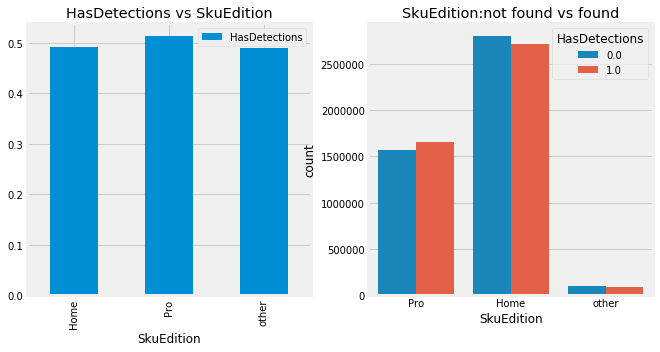

In [69]:
draw_categorical('SkuEdition')

In [70]:
categorical_variables.append('SkuEdition')

# IeVerIdentifier

In [71]:
train['IeVerIdentifier'].value_counts().head()

137.0    3885842
117.0    1767931
108.0     474390
111.0     467828
98.0      354411
Name: IeVerIdentifier, dtype: int64

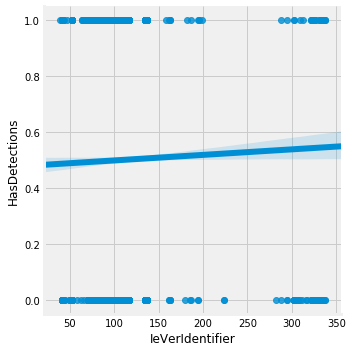

In [72]:
sns.lmplot('IeVerIdentifier','HasDetections',data=train.sample(10000),logistic=True)

In [73]:
train=train.drop(['IeVerIdentifier'],axis=1)
test=test.drop(['IeVerIdentifier'],axis=1)

# SmartScreen

In [74]:
train['SmartScreen'].value_counts()

RequireAdmin    4316183
ExistsNotSet    1046183
Off              186553
Warn             135483
Prompt            34533
Block             22533
off                1350
On                  731
&#x02;              416
&#x01;              335
on                  147
requireadmin         10
OFF                   4
0                     3
Promt                 2
warn                  1
prompt                1
Enabled               1
requireAdmin          1
00000000              1
&#x03;                1
Name: SmartScreen, dtype: int64

In [75]:
agg={}
agg['&#x01;']='&#x'
agg['&#x02;']='&#x'
agg['&#x03;']='&#x'
agg['requireAdmin']='RequireAdmin'
agg['RequireAdmin']='RequireAdmin'
agg['requireadmin']='RequireAdmin'
agg['prompt']='prompt'
agg['Promt']='prompt'
agg['on']='OFF'
agg['OFF']='OFF'
agg['off']='OFF'
agg['warn']='warn'
agg['Warn']='warn'
agg['00000000']='0'
agg['0']='0'
agg['Enabled']='Enabled'
agg['Block']='Block'
agg['ExistsNotSet']='ExistsNotSet'
train['SmartScreen']=train['SmartScreen'].map(agg)
test['SmartScreen']=test['SmartScreen'].map(agg)

In [77]:
train['SmartScreen'].value_counts(dropna=False)/len(train)

RequireAdmin    4.837978e-01
NaN             3.809712e-01
ExistsNotSet    1.172656e-01
warn            1.518626e-02
Block           2.525701e-03
OFF             1.682456e-04
&#x             8.429092e-05
0               4.483560e-07
prompt          3.362670e-07
Enabled         1.120890e-07
Name: SmartScreen, dtype: float64

In [78]:
agg={}
for i in train['SmartScreen'].unique():
    if (train['SmartScreen']==i).mean()<0.1:
        agg[i]='other'
    else:
        agg[i]=i

In [79]:
train['SmartScreen']=train['SmartScreen'].map(agg)
test['SmartScreen']=test['SmartScreen'].map(agg)

RequireAdmin    4316194
other           3559106
ExistsNotSet    1046183
Name: SmartScreen, dtype: int64


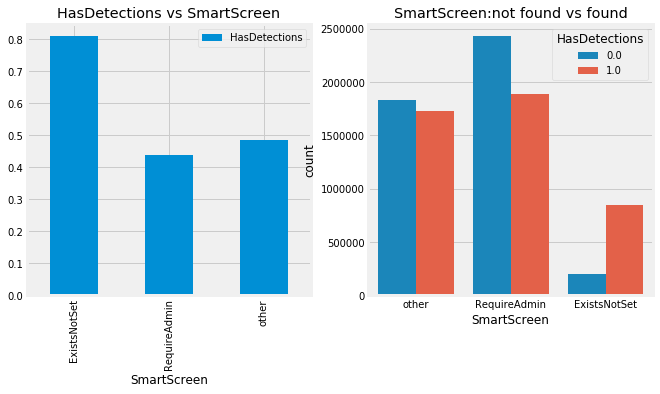

In [80]:
draw_categorical('SmartScreen')

In [81]:
categorical_variables.append('SmartScreen')

# Census_MDC2FormFactor

In [82]:
train['Census_MDC2FormFactor'].value_counts()/len(train)

Notebook        6.415210e-01
Desktop         2.186953e-01
Convertible     4.543841e-02
Detachable      3.342864e-02
AllInOne        3.273862e-02
PCOther         1.568741e-02
LargeTablet     7.523525e-03
SmallTablet     3.518810e-03
SmallServer     9.673280e-04
MediumServer    3.794212e-04
LargeServer     9.807786e-05
ServerOther     3.362670e-06
IoTOther        1.120890e-07
Name: Census_MDC2FormFactor, dtype: float64

In [83]:
agg={}
for i in train['Census_MDC2FormFactor'].unique():
    if 'Server' in i:
        agg[i]='Server'
    elif 'Tablet' in i:
        agg[i]='Tablet'
    else:
        agg[i]=i
train['Census_MDC2FormFactor']=train['Census_MDC2FormFactor'].map(agg)
test['Census_MDC2FormFactor']=test['Census_MDC2FormFactor'].map(agg)

In [84]:
train['Census_MDC2FormFactor'].value_counts()/len(train)

Notebook       6.415210e-01
Desktop        2.186953e-01
Convertible    4.543841e-02
Detachable     3.342864e-02
AllInOne       3.273862e-02
PCOther        1.568741e-02
Tablet         1.104233e-02
Server         1.448190e-03
IoTOther       1.120890e-07
Name: Census_MDC2FormFactor, dtype: float64

In [85]:
agg={}
for i in train['Census_MDC2FormFactor'].unique():
    if 'Server' in i:
        agg[i]='Desktop'
    elif 'PC' in i:
        agg[i]='Desktop'
    elif 'Desktop' in i:
        agg[i]='Desktop'
    elif 'Notebook' in i:
        agg[i]='Notebook'
    else:
        agg[i]='other'
train['Census_MDC2FormFactor']=train['Census_MDC2FormFactor'].map(agg)
test['Census_MDC2FormFactor']=test['Census_MDC2FormFactor'].map(agg)

In [86]:
train['Census_MDC2FormFactor'].value_counts()/len(train)

Notebook    0.641521
Desktop     0.235831
other       0.122648
Name: Census_MDC2FormFactor, dtype: float64

Notebook    5723319
Desktop     2103961
other       1094203
Name: Census_MDC2FormFactor, dtype: int64


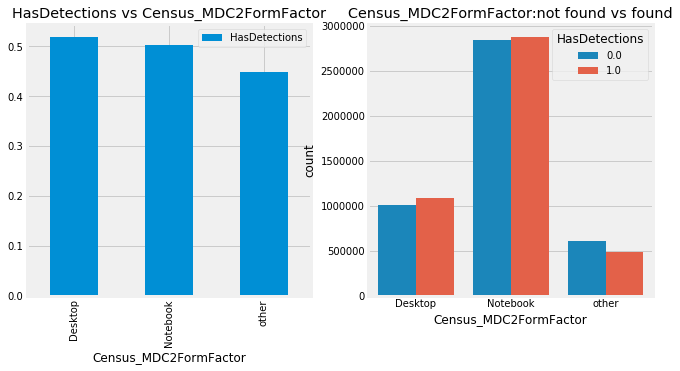

In [87]:
draw_categorical('Census_MDC2FormFactor')

In [88]:
categorical_variables.append('Census_MDC2FormFactor')

# Census_OEMNameIdentifier and Census_OEMModelIdentifier

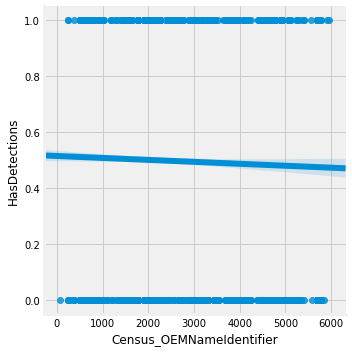

In [89]:
sns.lmplot('Census_OEMNameIdentifier','HasDetections',data=train.sample(10000),logistic=True)

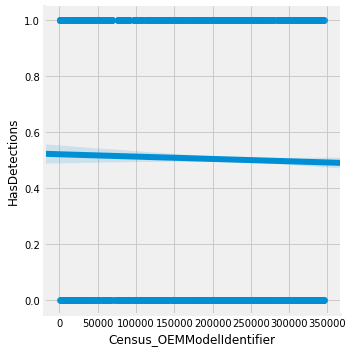

In [90]:
sns.lmplot('Census_OEMModelIdentifier','HasDetections',data=train.sample(10000),logistic=True)

In [91]:
train[['Census_OEMNameIdentifier','Census_OEMModelIdentifier']].head()

,Census_OEMNameIdentifier,Census_OEMModelIdentifier
0,2668.0,9124.0
1,2668.0,91656.0
2,4908.0,317701.0
3,1443.0,275890.0
4,1443.0,331929.0


# Census_ProcessorCoreCount

4.0     5430193
2.0     2311969
8.0      865004
12.0      92702
1.0       70390
Name: Census_ProcessorCoreCount, dtype: int64


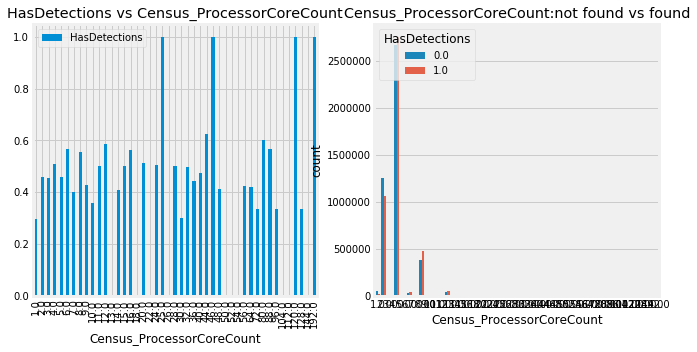

In [92]:
draw_categorical('Census_ProcessorCoreCount')

In [93]:
train['Census_ProcessorCoreCount'].value_counts().keys().sort_values()

Float64Index([  1.0,   2.0,   3.0,   4.0,   5.0,   6.0,   7.0,   8.0,   9.0,
               10.0,  11.0,  12.0,  13.0,  14.0,  15.0,  16.0,  18.0,  20.0,
               22.0,  24.0,  25.0,  26.0,  28.0,  30.0,  32.0,  36.0,  40.0,
               44.0,  46.0,  48.0,  50.0,  52.0,  54.0,  56.0,  64.0,  72.0,
               80.0,  88.0,  96.0, 104.0, 112.0, 120.0, 128.0, 144.0, 192.0],
             dtype='float64')

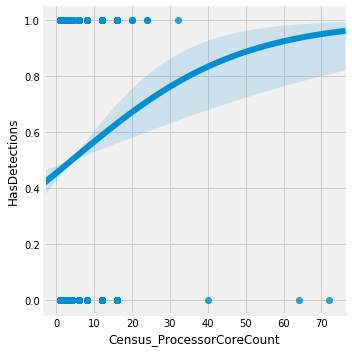

In [94]:
sns.lmplot('Census_ProcessorCoreCount','HasDetections',data=train.sample(10000),logistic=True)

# Census_ProcessorManufacturerIdentifier

In [95]:
train['Census_ProcessorManufacturerIdentifier'].value_counts()

5.0     7839318
1.0     1040292
10.0        339
3.0         218
9.0           1
7.0           1
4.0           1
Name: Census_ProcessorManufacturerIdentifier, dtype: int64

5.0     7839318
1.0     1040292
10.0        339
3.0         218
9.0           1
Name: Census_ProcessorManufacturerIdentifier, dtype: int64


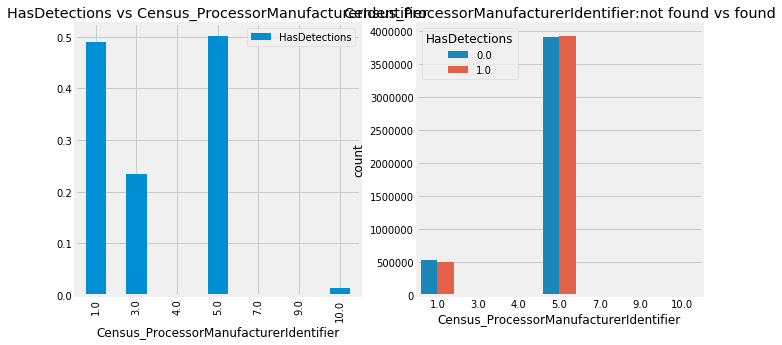

In [96]:
draw_categorical('Census_ProcessorManufacturerIdentifier')

In [97]:
train=train.drop(['Census_ProcessorManufacturerIdentifier'],axis=1)
test=test.drop(['Census_ProcessorManufacturerIdentifier'],axis=1)

# Census_ProcessorModelIdentifier

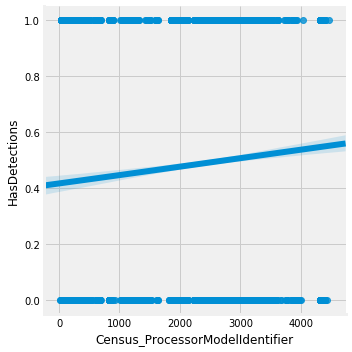

In [98]:
sns.lmplot('Census_ProcessorModelIdentifier','HasDetections',data=train.sample(10000),logistic=True)

# Census_PrimaryDiskTotalCapacity and Census_SystemVolumeTotalCapacity

In [99]:
train['Census_PrimaryDiskTotalCapacity'].describe()

count    8.868467e+06
mean     2.912138e+06
std      4.451633e+09
min      0.000000e+00
25%      2.393720e+05
50%      4.769400e+05
75%      9.538690e+05
max      8.160437e+12
Name: Census_PrimaryDiskTotalCapacity, dtype: float64

In [100]:
train['Census_SystemVolumeTotalCapacity'].describe()

count    8.868481e+06
mean     3.823069e+05
std      3.233614e+05
min      0.000000e+00
25%      1.207750e+05
50%      2.495000e+05
75%      4.759730e+05
max      4.768710e+07
Name: Census_SystemVolumeTotalCapacity, dtype: float64

In [101]:
train['mb_left']=(train['Census_PrimaryDiskTotalCapacity']-train['Census_SystemVolumeTotalCapacity'])
test['mb_left']=(test['Census_PrimaryDiskTotalCapacity']-test['Census_SystemVolumeTotalCapacity'])

In [102]:
train['mb_ratio']=(train['Census_PrimaryDiskTotalCapacity']/train['Census_SystemVolumeTotalCapacity'])
test['mb_ratio']=(test['Census_PrimaryDiskTotalCapacity']/test['Census_SystemVolumeTotalCapacity'])

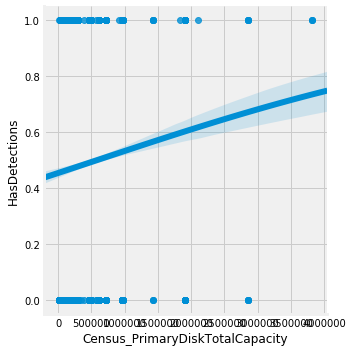

In [103]:
sns.lmplot('Census_PrimaryDiskTotalCapacity','HasDetections',data=train.sample(10000),logistic=True)

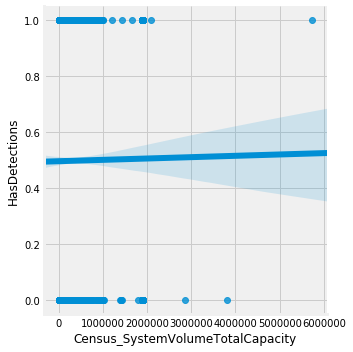

In [104]:
sns.lmplot('Census_SystemVolumeTotalCapacity','HasDetections',data=train.sample(10000),logistic=True)

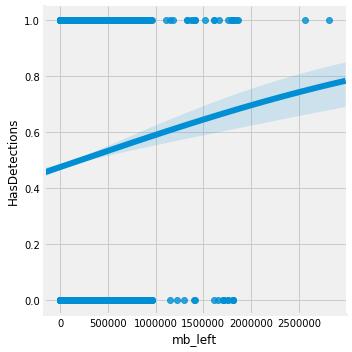

In [105]:
sns.lmplot('mb_left','HasDetections',data=train.sample(10000),logistic=True)

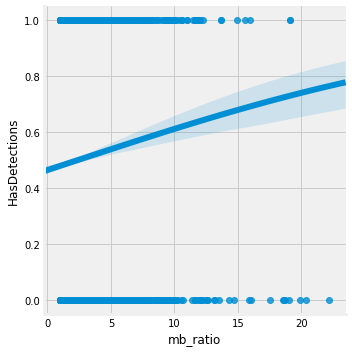

In [106]:
sns.lmplot('mb_ratio','HasDetections',data=train.sample(10000),logistic=True)

# Census_PrimaryDiskTypeName

In [107]:
train['Census_PrimaryDiskTypeName'].value_counts(dropna=False)/len(train)

HDD            0.650879
SSD            0.276502
UNKNOWN        0.040156
Unspecified    0.031024
NaN            0.001440
Name: Census_PrimaryDiskTypeName, dtype: float64

In [108]:
agg={}
for i in train['Census_PrimaryDiskTypeName'].unique():
    if (train['Census_PrimaryDiskTypeName']==i).mean()<0.1:
        agg[i]='other'
    else:
        agg[i]=i
train['Census_PrimaryDiskTypeName']=train['Census_PrimaryDiskTypeName'].map(agg)
test['Census_PrimaryDiskTypeName']=test['Census_PrimaryDiskTypeName'].map(agg)

HDD      5806804
SSD      2466808
other     647871
Name: Census_PrimaryDiskTypeName, dtype: int64


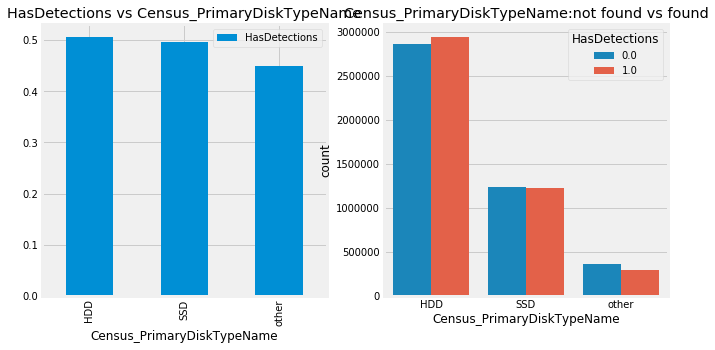

In [109]:
draw_categorical('Census_PrimaryDiskTypeName')

In [110]:
categorical_variables.append('Census_PrimaryDiskTypeName')

# Census_TotalPhysicalRAM

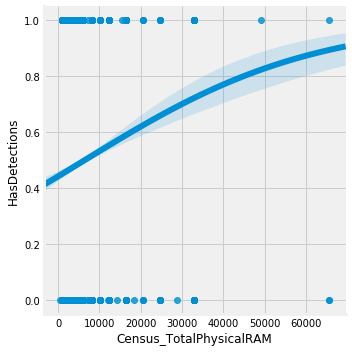

In [111]:
sns.lmplot('Census_TotalPhysicalRAM','HasDetections',data=train.sample(10000),logistic=True)

In [112]:
train['mb_ratio1']=train['Census_SystemVolumeTotalCapacity']/train['Census_TotalPhysicalRAM']
test['mb_ratio1']=test['Census_SystemVolumeTotalCapacity']/test['Census_TotalPhysicalRAM']

# Census_ChassisTypeName

In [113]:
train['Census_ChassisTypeName'].value_counts()

Notebook               5248812
Desktop                1872125
Laptop                  685581
Portable                360903
AllinOne                204295
MiniTower                85127
Convertible              84472
Other                    75782
UNKNOWN                  67212
Detachable               51466
LowProfileDesktop        50072
HandHeld                 46009
SpaceSaving              29070
Tablet                   13630
Tower                    12549
Unknown                  10011
MainServerChassis         9545
MiniPC                    4433
LunchBox                  3971
RackMountChassis          3410
SubNotebook                807
BusExpansionChassis        720
30                         243
StickPC                    142
0                          133
MultisystemChassis          61
Blade                       52
35                          50
PizzaBox                    46
SealedCasePC                39
SubChassis                  16
ExpansionChassis            12
31      

In [114]:
train=train.drop(['Census_ChassisTypeName'],axis=1)
test=test.drop(['Census_ChassisTypeName'],axis=1)

# Census_InternalPrimaryDiagonalDisplaySizeInInches and Census_PowerPlatformRoleName

In [115]:
train['Census_PowerPlatformRoleName']=np.where(train['Census_PowerPlatformRoleName']=='Unspecified','UNKNOWN',train['Census_PowerPlatformRoleName'])
test['Census_PowerPlatformRoleName']=np.where(test['Census_PowerPlatformRoleName']=='Unspecified','UNKNOWN',test['Census_PowerPlatformRoleName'])

In [116]:
train['Census_PowerPlatformRoleName'].value_counts()/len(train)

Mobile               0.693036
Desktop              0.231645
Slate                0.055208
Workstation          0.012294
SOHOServer           0.004242
UNKNOWN              0.002313
EnterpriseServer     0.000795
AppliancePC          0.000450
PerformanceServer    0.000011
Name: Census_PowerPlatformRoleName, dtype: float64

Mobile         6182908
Desktop        2066620
Slate           492537
Workstation     109683
SOHOServer       37841
Name: Census_PowerPlatformRoleName, dtype: int64


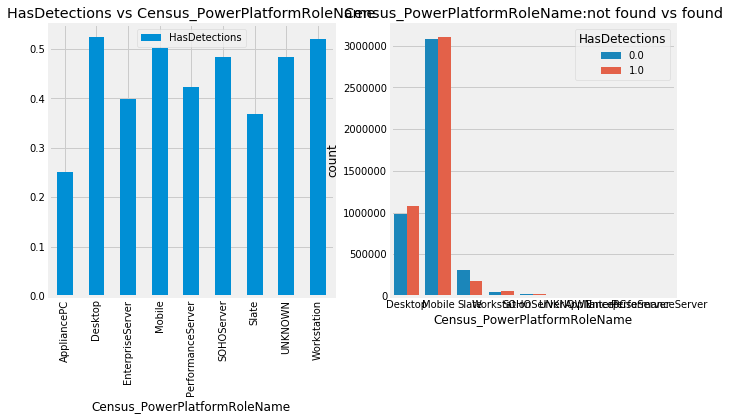

In [117]:
draw_categorical('Census_PowerPlatformRoleName')

In [118]:
a=train.groupby(['Census_PowerPlatformRoleName'])['Census_InternalPrimaryDiagonalDisplaySizeInInches'].mean().reset_index()
a=a.rename(index=str, columns={'Census_InternalPrimaryDiagonalDisplaySizeInInches': 'Census_InternalPrimaryDiagonalDisplaySizeInInches_mean'})

In [119]:
train=pd.merge(train,a,on='Census_PowerPlatformRoleName',how='left')
test=pd.merge(test,a,on='Census_PowerPlatformRoleName',how='left')

In [120]:
train['Census_InternalPrimaryDiagonalDisplaySizeInInches_ratio']=train['Census_InternalPrimaryDiagonalDisplaySizeInInches']/train['Census_InternalPrimaryDiagonalDisplaySizeInInches_mean']
test['Census_InternalPrimaryDiagonalDisplaySizeInInches_ratio']=test['Census_InternalPrimaryDiagonalDisplaySizeInInches']/test['Census_InternalPrimaryDiagonalDisplaySizeInInches_mean']

In [121]:
train=train.drop(['Census_InternalPrimaryDiagonalDisplaySizeInInches_mean'],axis=1)
test=test.drop(['Census_InternalPrimaryDiagonalDisplaySizeInInches_mean'],axis=1)

In [122]:
train['Census_InternalPrimaryDiagonalDisplaySizeInInches_ratio'].corr(train['HasDetections'])

0.016819741083479004

In [123]:
agg={}
for i in train['Census_PowerPlatformRoleName'].unique():
    if (train['Census_PowerPlatformRoleName']==i).mean()<0.05:
        agg[i]='other'
    else:
        agg[i]=i
train['Census_PowerPlatformRoleName']=train['Census_PowerPlatformRoleName'].map(agg)
test['Census_PowerPlatformRoleName']=test['Census_PowerPlatformRoleName'].map(agg)
categorical_variables.append('Census_PowerPlatformRoleName')

Mobile     6182908
Desktop    2066620
Slate       492537
other       179418
Name: Census_PowerPlatformRoleName, dtype: int64


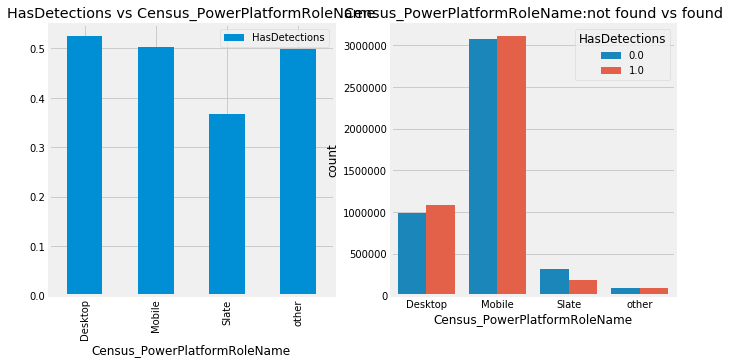

In [124]:
draw_categorical('Census_PowerPlatformRoleName')

# Census_InternalPrimaryDisplayResolutionHorizontal and Census_InternalPrimaryDisplayResolutionVertical

In [125]:
train['density']=train['Census_InternalPrimaryDisplayResolutionHorizontal']/train['Census_InternalPrimaryDiagonalDisplaySizeInInches']
test['density']=test['Census_InternalPrimaryDisplayResolutionHorizontal']/test['Census_InternalPrimaryDiagonalDisplaySizeInInches']

In [126]:
train['density1']=train['Census_InternalPrimaryDisplayResolutionVertical']/train['Census_InternalPrimaryDiagonalDisplaySizeInInches']
test['density1']=test['Census_InternalPrimaryDisplayResolutionVertical']/test['Census_InternalPrimaryDiagonalDisplaySizeInInches']

In [127]:
train['len_height_ratio']=train['Census_InternalPrimaryDisplayResolutionHorizontal']/train['Census_InternalPrimaryDisplayResolutionVertical']
test['len_height_ratio']=test['Census_InternalPrimaryDisplayResolutionHorizontal']/test['Census_InternalPrimaryDisplayResolutionVertical']

# Census_InternalBatteryType

In [128]:
agg={}
for i in train['Census_InternalBatteryType'].unique():
    if (train['Census_InternalBatteryType']==i).mean()<0.05:
        agg[i]='other'
    else:
        agg[i]=i
train['Census_InternalBatteryType']=train['Census_InternalBatteryType'].map(agg)
test['Census_InternalBatteryType']=test['Census_InternalBatteryType'].map(agg)
categorical_variables.append('Census_InternalBatteryType')

other    6893227
lion     2028256
Name: Census_InternalBatteryType, dtype: int64


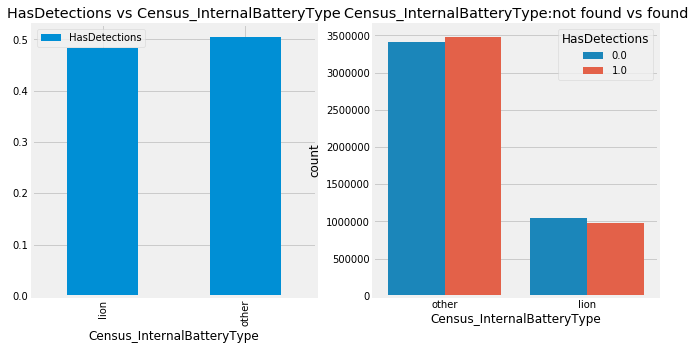

In [129]:
draw_categorical('Census_InternalBatteryType')

In [130]:
categorical_variables.append('Census_InternalBatteryType')

# Census_InternalBatteryNumberOfCharges

In [131]:
train['Census_InternalBatteryNumberOfCharges'].value_counts()

0.000000e+00    5053404
4.294967e+09    2263993
1.000000e+00      53810
2.000000e+00      28128
1.600000e+01      27348
3.000000e+00      21537
3.300000e+01      19723
4.000000e+00      18020
5.000000e+00      16190
6.000000e+00      14472
7.000000e+00      13506
8.000000e+00      12985
9.000000e+00      12020
3.740000e+02      11630
1.000000e+01      11518
1.100000e+01      11082
4.380000e+02      10707
1.200000e+01      10561
1.300000e+01       9965
1.400000e+01       9803
3.770000e+02       9716
1.500000e+01       9621
2.560000e+02       9582
2.600000e+01       9243
1.700000e+01       8937
1.800000e+01       8818
3.840000e+02       8691
1.900000e+01       8473
2.000000e+01       8322
2.100000e+01       8194
                 ...   
3.463400e+04          1
3.456200e+04          1
3.455800e+04          1
3.447000e+04          1
3.450500e+04          1
3.447400e+04          1
3.448100e+04          1
3.448300e+04          1
3.448400e+04          1
3.448500e+04          1
3.448700e+04    

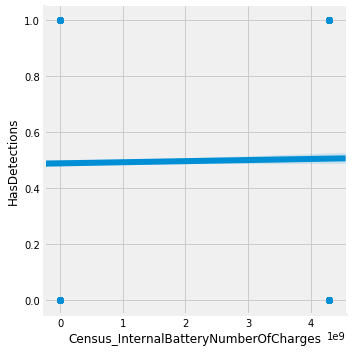

In [132]:
sns.lmplot('Census_InternalBatteryNumberOfCharges','HasDetections',data=train.sample(10000),logistic=True)

In [133]:
train['Census_InternalBatteryNumberOfCharges'].corr(train['HasDetections'])

0.0201470513997596

In [134]:
a=train.groupby('Census_PowerPlatformRoleName')['Census_InternalBatteryNumberOfCharges'].mean().reset_index()
a=a.rename(index=str, columns={'Census_InternalBatteryNumberOfCharges': 'Census_InternalBatteryNumberOfCharges_mean'})
train=pd.merge(train,a,on='Census_PowerPlatformRoleName',how='left')
test=pd.merge(test,a,on='Census_PowerPlatformRoleName',how='left')
train['Census_InternalBatteryNumberOfCharges_ratio']=train['Census_InternalBatteryNumberOfCharges']/train['Census_InternalBatteryNumberOfCharges_mean']
test['Census_InternalBatteryNumberOfCharges_ratio']=test['Census_InternalBatteryNumberOfCharges']/test['Census_InternalBatteryNumberOfCharges_mean']

train=train.drop(['Census_InternalBatteryNumberOfCharges_mean'],axis=1)
test=test.drop(['Census_InternalBatteryNumberOfCharges_mean'],axis=1)

In [135]:
train['Census_InternalBatteryNumberOfCharges_ratio'].corr(train['HasDetections'])

-0.01037172401278982

# Census_OSVersion

In [136]:
train['Census_OSVersion'].value_counts()

10.0.17134.228      1413627
10.0.17134.165       899711
10.0.16299.431       546546
10.0.17134.285       470280
10.0.16299.547       346853
10.0.17134.112       346410
10.0.16299.371       325267
10.0.17134.191       228254
10.0.14393.2189      223775
10.0.16299.611       216776
10.0.16299.125       213342
10.0.10240.17443     206843
10.0.10586.1176      182087
10.0.16299.492       168878
10.0.16299.309       151196
10.0.17134.286       139040
10.0.16299.15        117555
10.0.17134.254       112344
10.0.15063.1206      102275
10.0.15063.1266      101237
10.0.17134.1         100759
10.0.16299.192        99068
10.0.17134.167        86787
10.0.16299.248        77476
10.0.17134.137        75873
10.0.17134.48         66266
10.0.15063.0          65397
10.0.15063.1088       63274
10.0.14393.0          59950
10.0.17134.81         55384
                     ...   
10.0.18230.1000           1
10.0.16299.365            1
10.0.17753.1              1
10.0.14306.112            1
10.0.17694.1000     

In [137]:
train['Census_OSVersion']=train['Census_OSVersion'].str.split('.').apply(lambda x: x[0]+"."+x[1]+x[2]+x[3]).astype(float)
test['Census_OSVersion']=test['Census_OSVersion'].str.split('.').apply(lambda x: x[0]+"."+x[1]+x[2]+x[3]).astype(float)

In [138]:
train['Census_OSVersion'].corr(train['HasDetections'])

0.01025851038285339

# Census_OSBranch

In [139]:
train['Census_OSBranch'].value_counts()/len(train)

rs4_release                  4.493825e-01
rs3_release                  1.386901e-01
rs3_release_svc_escrow       1.344807e-01
rs2_release                  8.934232e-02
rs1_release                  8.804971e-02
th2_release                  3.661443e-02
th2_release_sec              2.991453e-02
th1_st1                      2.195151e-02
th1                          8.492310e-03
rs5_release                  1.717652e-03
rs3_release_svc_escrow_im    6.928220e-04
rs_prerelease                3.554342e-04
rs_prerelease_flt            3.042095e-04
rs5_release_sigma            6.949517e-06
rs1_release_srvmedia         1.120890e-06
winblue_ltsb_escrow          8.967119e-07
win7sp1_ldr                  3.362670e-07
win8_gdr                     3.362670e-07
winblue_ltsb                 3.362670e-07
rs_xbox                      2.241780e-07
win7sp1_ldr_escrow           2.241780e-07
rs5_release_edge             2.241780e-07
rs5_release_sigma_dev        2.241780e-07
rs1_release_svc              1.120

In [140]:
agg={}
for i in train['Census_OSBranch'].unique():
    if (train['Census_OSBranch']==i).mean()<0.05:
        agg[i]='other'
    else:
        agg[i]=i
train['Census_OSBranch']=train['Census_OSBranch'].map(agg)
test['Census_OSBranch']=test['Census_OSBranch'].map(agg)

In [141]:
categorical_variables.append('Census_OSBranch')

# Census_OSBuildNumber

In [142]:
train['relative_OSBuilder']=train['Census_OSBuildNumber']/train['EngineVersion']
test['relative_OSBuilder']=test['Census_OSBuildNumber']/test['EngineVersion']

In [143]:
train['Census_OSBuildNumber'].corr(train['HasDetections'])

0.02948552920112452

In [144]:
train['relative_OSBuilder'].corr(train['HasDetections'])

0.021327382054151287

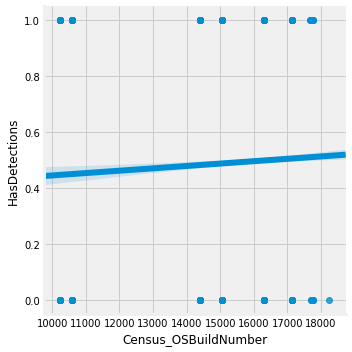

In [145]:
sns.lmplot('Census_OSBuildNumber','HasDetections',data=train.sample(10000),logistic=True)

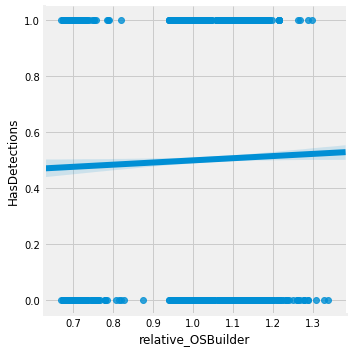

In [146]:
sns.lmplot('relative_OSBuilder','HasDetections',data=train.sample(10000),logistic=True)

In [148]:
plot_two_categories('Census_OSBuildNumber','relative_OSBuilder',10000)

NameError: name 'plot_two_categories' is not defined

As you can see, relative_OSBuilder seems to be helpful.

In [149]:
train[['Census_OSVersion','Census_OSBuildNumber']].head()

,Census_OSVersion,Census_OSBuildNumber
0,10.017134,17134
1,10.017134,17134
2,10.017134,17134
3,10.017134,17134
4,10.017134,17134


In [150]:
train=train.drop(['Census_OSBuildNumber'],axis=1)
test=test.drop(['Census_OSBuildNumber'],axis=1)

In [151]:
train['Census_OSVersion'].value_counts().head(10)/len(train)

10.017134    0.158452
10.017134    0.100848
10.016299    0.061262
10.017134    0.052713
10.016300    0.038878
10.017134    0.038829
10.016299    0.036459
10.017134    0.025585
10.014393    0.025083
10.016300    0.024298
Name: Census_OSVersion, dtype: float64

# Census_OSBuildRevision

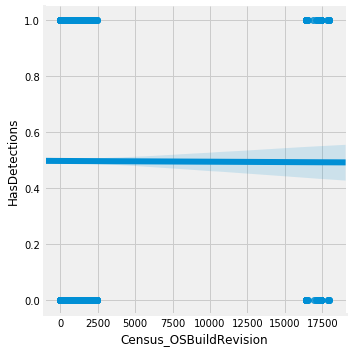

In [152]:
sns.lmplot('Census_OSBuildRevision','HasDetections',data=train.sample(10000),logistic=True)

In [153]:
plot_two_categories('Census_OSVersion','relative_OSBuilder')

NameError: name 'plot_two_categories' is not defined

# Census_OSEdition

In [158]:
train['Census_OSEdition'].value_counts()/len(train)

Core                           3.889478e-01
Professional                   3.509020e-01
CoreSingleLanguage             2.180648e-01
CoreCountrySpecific            1.861798e-02
ProfessionalEducation          6.355221e-03
Education                      4.562470e-03
Enterprise                     3.990704e-03
ProfessionalN                  3.176714e-03
EnterpriseS                    2.244022e-03
ServerStandard                 1.135237e-03
Cloud                          7.033584e-04
CoreN                          5.369063e-04
ServerStandardEval             3.083568e-04
EducationN                     1.044669e-04
EnterpriseSN                   9.841413e-05
ServerDatacenterEval           9.292177e-05
ServerSolution                 7.655678e-05
EnterpriseN                    3.934323e-05
ProfessionalEducationN         2.152109e-05
ProfessionalWorkstation        1.434739e-05
ServerDatacenter               1.681335e-06
ProfessionalWorkstationN       1.457157e-06
CloudN                         8

In [159]:
agg={}
for i in train['Census_OSEdition'].unique():
    if (train['Census_OSEdition']==i).mean()<0.1:
        agg[i]='other'
    else:
        agg[i]=i
train['Census_OSEdition']=train['Census_OSEdition'].map(agg)
test['Census_OSEdition']=test['Census_OSEdition'].map(agg)

Core                  3469991
Professional          3130566
CoreSingleLanguage    1945461
other                  375465
Name: Census_OSEdition, dtype: int64


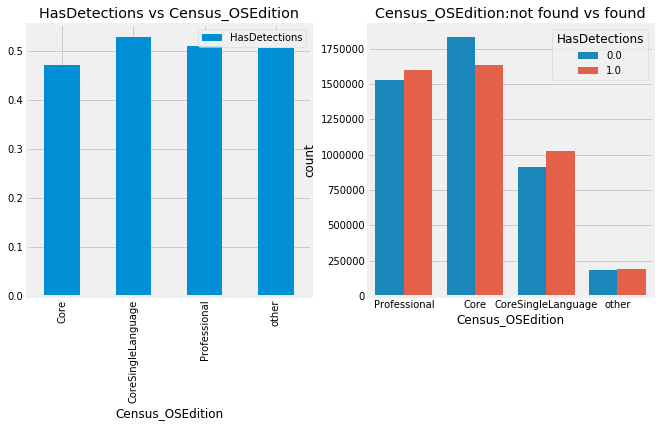

In [160]:
draw_categorical('Census_OSEdition')

In [161]:
categorical_variables.append('Census_OSEdition')

# Census_OSSkuName

In [162]:
train['Census_OSSkuName'].value_counts()

CORE                            3469869
PROFESSIONAL                    3187913
CORE_SINGLELANGUAGE             1945133
CORE_COUNTRYSPECIFIC             165886
EDUCATION                         40827
ENTERPRISE                        35602
PROFESSIONAL_N                    28522
ENTERPRISE_S                      20022
STANDARD_SERVER                   10128
CLOUD                              6167
CORE_N                             4787
STANDARD_EVALUATION_SERVER         2755
EDUCATION_N                         927
ENTERPRISE_S_N                      881
DATACENTER_EVALUATION_SERVER        829
SB_SOLUTION_SERVER                  684
ENTERPRISE_N                        356
PRO_WORKSTATION                     124
UNLICENSED                           17
DATACENTER_SERVER                    14
PRO_WORKSTATION_N                    12
CLOUDN                                7
PRO_CHINA                             5
ULTIMATE                              4
SERVERRDSH                            4


In [163]:
train=train.drop(['Census_OSSkuName'],axis=1)
test=test.drop(['Census_OSSkuName'],axis=1)

# Census_OSInstallTypeName

In [164]:
train['Census_OSInstallTypeName'].value_counts()

UUPUpgrade        2608037
IBSClean          1650733
Update            1593308
Upgrade           1251559
Other              840121
Reset              649201
Refresh            205842
Clean               69073
CleanPCRefresh      53609
Name: Census_OSInstallTypeName, dtype: int64

In [165]:
agg={}
for i in train['Census_OSInstallTypeName'].unique():
    if i=='Update':
        agg[i]='Upgrade'
    elif "Clean" in i:
        agg[i]='Clean'
    elif i=='Refresh':
        agg[i]="Reset"
    else:
        agg[i]=i
train['Census_OSInstallTypeName']=train['Census_OSInstallTypeName'].map(agg)
test['Census_OSInstallTypeName']=test['Census_OSInstallTypeName'].map(agg)

Upgrade       2844867
UUPUpgrade    2608037
Clean         1773415
Reset          855043
Other          840121
Name: Census_OSInstallTypeName, dtype: int64


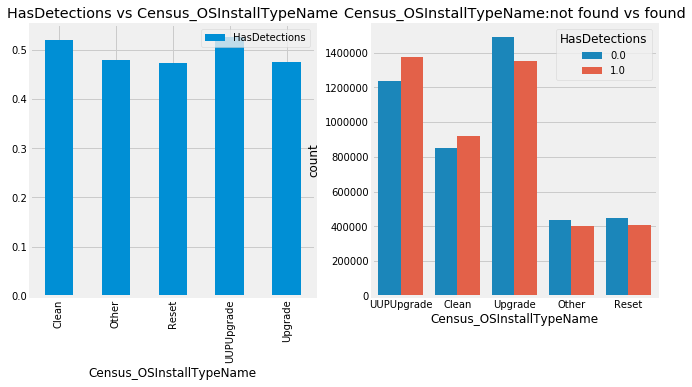

In [166]:
draw_categorical('Census_OSInstallTypeName')

In [167]:
categorical_variables.append('Census_OSInstallTypeName')

# Census_OSInstallLanguageIdentifier

In [168]:
train['Census_OSInstallLanguageIdentifier'].corr(train['HasDetections'])

0.0025464337826315636

In [169]:
test['HasDetections']=np.nan
train_test=pd.concat([train,test],axis=0)
agg={}
for i in train_test['Census_OSInstallLanguageIdentifier'].unique():
    agg[i]=(train_test['Census_OSInstallLanguageIdentifier']==i).sum()

train_test['Census_OSInstallLanguageIdentifier_count_encoding']=train_test['Census_OSInstallLanguageIdentifier'].map(agg)
train_test=train_test.drop(['Census_OSInstallLanguageIdentifier'],axis=1)

In [170]:
train=train_test.loc[~train_test['HasDetections'].isnull(),]
test=train_test.loc[train_test['HasDetections'].isnull(),]

In [171]:
train['Census_OSInstallLanguageIdentifier_count_encoding'].corr(train['HasDetections'])

0.013825911801931448

# Census_OSUILocaleIdentifier

In [172]:
train['Census_OSUILocaleIdentifier'].value_counts()

31     3170824
34     1040042
30      513995
125     498236
49      436691
158     408118
35      377071
119     337988
26      252863
148     206854
160     201983
72      191930
83      170681
109     142479
115     132758
120     108817
74       84458
64       84426
5        81845
20       72672
28       50797
140      48933
58       41994
24       35558
128      32294
105      29567
130      22721
44       19963
11       18618
62       16130
        ...   
66           3
82           2
85           2
55           2
3            2
112          2
10           2
107          2
96           2
134          2
86           2
133          2
144          1
147          1
155          1
14           1
108          1
127          1
18           1
117          1
113          1
22           1
52           1
104          1
67           1
61           1
57           1
56           1
43           1
1            1
Name: Census_OSUILocaleIdentifier, Length: 147, dtype: int64

In [173]:
test['HasDetections']=np.nan
train_test=pd.concat([train,test],axis=0)
agg={}
for i in train_test['Census_OSUILocaleIdentifier'].unique():
    agg[i]=(train_test['Census_OSUILocaleIdentifier']==i).sum()

train_test['Census_OSUILocaleIdentifier_count_encoding']=train_test['Census_OSUILocaleIdentifier'].map(agg)
train_test=train_test.drop(['Census_OSUILocaleIdentifier'],axis=1)

In [174]:
train=train_test.loc[~train_test['HasDetections'].isnull(),]
test=train_test.loc[train_test['HasDetections'].isnull(),]

In [175]:
train['Census_OSUILocaleIdentifier_count_encoding'].corr(train['Census_OSInstallLanguageIdentifier_count_encoding'])

0.9798743344320997

In [176]:
train=train.drop(['Census_OSUILocaleIdentifier_count_encoding'],axis=1)
test=test.drop(['Census_OSUILocaleIdentifier_count_encoding'],axis=1)

# Census_OSWUAutoUpdateOptionsName

In [177]:
train['Census_OSWUAutoUpdateOptionsName'].value_counts()/len(train)

FullAuto                                 0.443256
UNKNOWN                                  0.282456
Notify                                   0.228017
AutoInstallAndRebootAtMaintenanceTime    0.041638
Off                                      0.003022
DownloadNotify                           0.001611
Name: Census_OSWUAutoUpdateOptionsName, dtype: float64

In [178]:
agg={}
for i in train['Census_OSWUAutoUpdateOptionsName'].unique():
    if (train['Census_OSWUAutoUpdateOptionsName']==i).mean()<0.1:
        agg[i]='other'
    else:
        agg[i]=i
train['Census_OSWUAutoUpdateOptionsName']=train['Census_OSWUAutoUpdateOptionsName'].map(agg)
test['Census_OSWUAutoUpdateOptionsName']=test['Census_OSWUAutoUpdateOptionsName'].map(agg)

FullAuto    3954497
UNKNOWN     2519925
Notify      2034254
other        412807
Name: Census_OSWUAutoUpdateOptionsName, dtype: int64


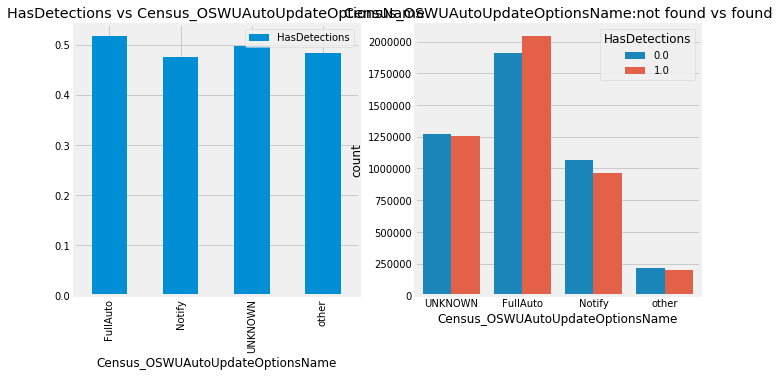

In [179]:
draw_categorical('Census_OSWUAutoUpdateOptionsName')

In [180]:
categorical_variables.append('Census_OSWUAutoUpdateOptionsName')

# Census_GenuineStateName

In [181]:
train['Census_GenuineStateName'].value_counts()/len(train)

IS_GENUINE         8.829919e-01
INVALID_LICENSE    8.986084e-02
OFFLINE            2.559731e-02
UNKNOWN            1.549742e-03
TAMPERED           2.241780e-07
Name: Census_GenuineStateName, dtype: float64

In [182]:
agg={}
for i in train['Census_GenuineStateName'].unique():
    if (train['Census_GenuineStateName']==i).mean()<0.05:
        agg[i]='other'
    else:
        agg[i]=i
train['Census_GenuineStateName']=train['Census_GenuineStateName'].map(agg)
test['Census_GenuineStateName']=test['Census_GenuineStateName'].map(agg)

IS_GENUINE         7877597
INVALID_LICENSE     801692
other               242194
Name: Census_GenuineStateName, dtype: int64


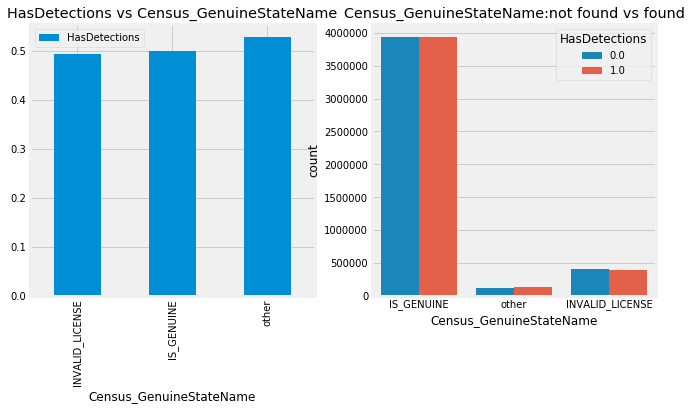

In [183]:
draw_categorical('Census_GenuineStateName')

In [184]:
categorical_variables.append('Census_GenuineStateName')

# Census_ActivationChannel

In [185]:
train['Census_ActivationChannel'].value_counts()/len(train)

Retail            0.529911
OEM:DM            0.382599
Volume:GVLK       0.050547
OEM:NONSLP        0.035642
Volume:MAK        0.000900
Retail:TB:Eval    0.000402
Name: Census_ActivationChannel, dtype: float64

In [186]:
agg={}
for i in train['Census_ActivationChannel'].unique():
    if (train['Census_ActivationChannel']==i).mean()<0.1:
        agg[i]='other'
    else:
        agg[i]=i
train['Census_ActivationChannel']=train['Census_ActivationChannel'].map(agg)
test['Census_ActivationChannel']=test['Census_ActivationChannel'].map(agg)

Retail    4727589
OEM:DM    3413350
other      780544
Name: Census_ActivationChannel, dtype: int64


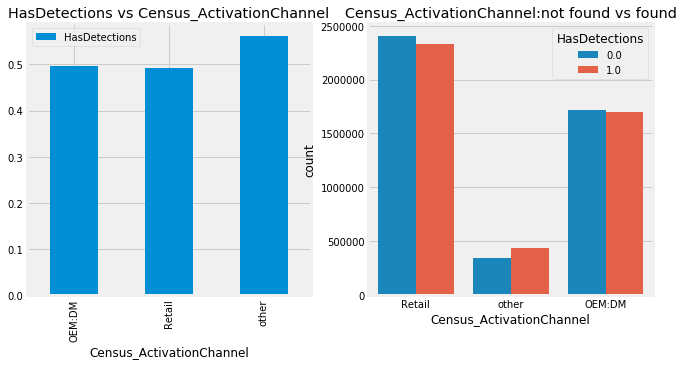

In [187]:
draw_categorical('Census_ActivationChannel')

In [188]:
categorical_variables.append('Census_ActivationChannel')

# Census_IsFlightingInternal

In [189]:
train=train.drop(['Census_IsFlightingInternal'],axis=1)
test=test.drop(['Census_IsFlightingInternal'],axis=1)

In [190]:
train['Census_ThresholdOptIn'].isnull().mean()

0.635244723326828

In [191]:
train=train.drop(['Census_ThresholdOptIn'],axis=1)
test=test.drop(['Census_ThresholdOptIn'],axis=1)

# Census_FirmwareManufacturerIdentifier

In [192]:
train['Census_FirmwareManufacturerIdentifier'].head()

0    628.0
1    628.0
2    142.0
3    355.0
4    355.0
Name: Census_FirmwareManufacturerIdentifier, dtype: float16

In [193]:
train['Census_FirmwareManufacturerIdentifier'].corr(train['HasDetections'])

-0.02592376028668558

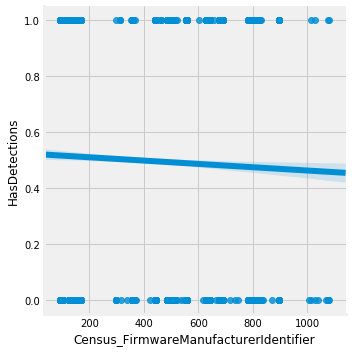

In [194]:
sns.lmplot('Census_FirmwareManufacturerIdentifier','HasDetections',data=train.sample(10000),logistic=True)

# Census_FirmwareVersionIdentifier

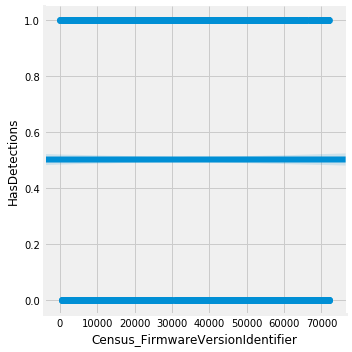

In [195]:
sns.lmplot('Census_FirmwareVersionIdentifier','HasDetections',data=train.sample(10000),logistic=True)

In [196]:
train=train.drop(['Census_FirmwareVersionIdentifier'],axis=1)
test=test.drop(['Census_FirmwareVersionIdentifier'],axis=1)

# Census_IsSecureBootEnabled

In [197]:
train['Census_IsSecureBootEnabled'].value_counts()

0    4585438
1    4336045
Name: Census_IsSecureBootEnabled, dtype: int64

0    4585438
1    4336045
Name: Census_IsSecureBootEnabled, dtype: int64


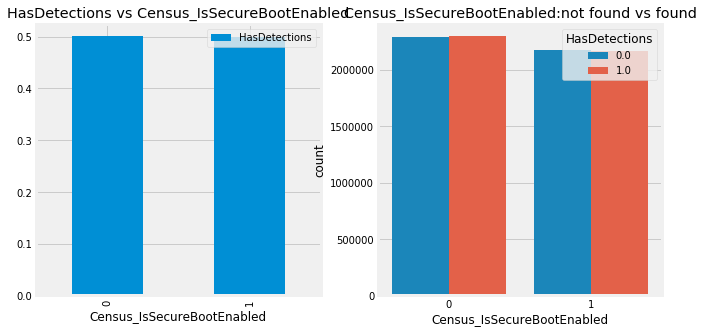

In [198]:
draw_categorical('Census_IsSecureBootEnabled')

# Census_IsWIMBootEnabled

In [199]:
train['Census_IsWIMBootEnabled'].value_counts(dropna=False)/len(train)

NaN     6.343904e-01
 0.0    3.656095e-01
 1.0    1.120890e-07
Name: Census_IsWIMBootEnabled, dtype: float64

In [200]:
train=train.drop(['Census_IsWIMBootEnabled'],axis=1)
test=test.drop(['Census_IsWIMBootEnabled'],axis=1)

# Census_IsTouchEnabled

In [201]:
train['Census_IsTouchEnabled'].value_counts()

0    7801452
1    1120031
Name: Census_IsTouchEnabled, dtype: int64

0    7801452
1    1120031
Name: Census_IsTouchEnabled, dtype: int64


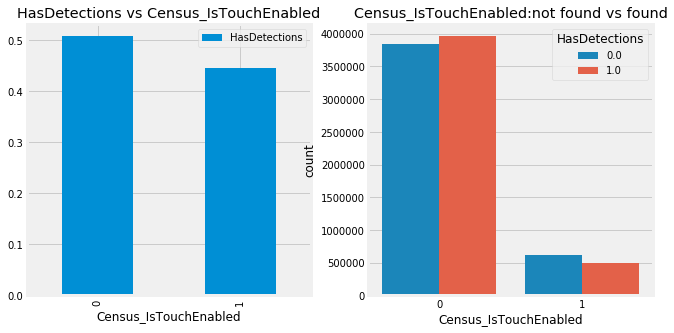

In [202]:
draw_categorical('Census_IsTouchEnabled')

# Wdft_IsGamer

In [203]:
train['Wdft_IsGamer'].value_counts()

0.0    6174143
1.0    2443889
Name: Wdft_IsGamer, dtype: int64

0.0    6174143
1.0    2443889
Name: Wdft_IsGamer, dtype: int64


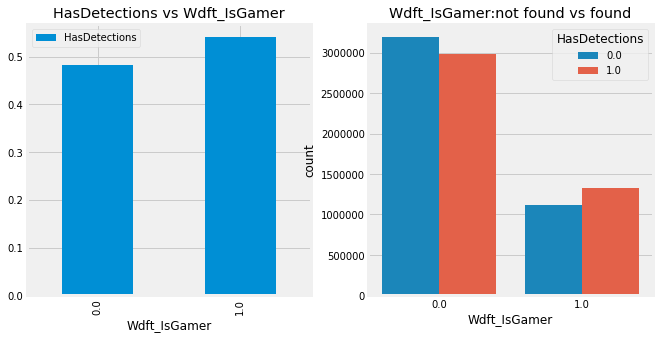

In [204]:
draw_categorical('Wdft_IsGamer')

# Wdft_RegionIdentifier

In [205]:
train['Wdft_RegionIdentifier'].nunique()

15

10.0    1800105
11.0    1347828
3.0     1295892
1.0     1232258
15.0    1017591
Name: Wdft_RegionIdentifier, dtype: int64


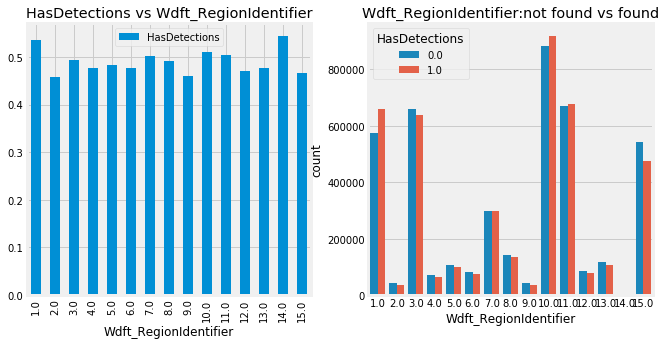

In [206]:
draw_categorical('Wdft_RegionIdentifier')

In [207]:
train['Wdft_RegionIdentifier'].corr(train['HasDetections'])

-0.022854908647806448

In [209]:
train.to_csv("baseline_tr_without_ohe.csv")
test.to_csv("baseline_ts_without_ohe.csv")

# one hot encoding

In [210]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [211]:
for i in categorical_variables[1:]:
    if train[i].nunique()>=3:
        train=pd.get_dummies(train,columns=[i])
        test=pd.get_dummies(test,columns=[i])
    else:
        train[i]=train[i].astype(object)
        test[i]=test[i].astype(object)
        vals=train[i].unique()
        train[i]=np.where(train[i]==vals[0],0,1)
        test[i]=np.where(test[i]==vals[0],0,1)
    print(i)

GeoNameIdentifier
LocaleEnglishNameIdentifier
OsPlatformSubRelease
SkuEdition
SmartScreen
Census_MDC2FormFactor
Census_PrimaryDiskTypeName
Census_PowerPlatformRoleName
Census_InternalBatteryType
Census_InternalBatteryType
Census_OSBranch
Census_OSEdition
Census_OSInstallTypeName
Census_OSWUAutoUpdateOptionsName
Census_GenuineStateName
Census_ActivationChannel


In [212]:
train.to_csv("baseline_tr_with_ohe.csv")
test.to_csv("baseline_ts_with_ohe.csv")

In [ ]:
target = train['HasDetections']
del train['HasDetections']

In [323]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import KFold
import warnings
import gc
import time
import sys
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn import metrics
# Plotly library
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)
pd.set_option('display.max_columns', 500)

param = {'num_leaves': 60,
         'min_data_in_leaf': 60, 
         'objective':'binary',
         'max_depth': -1,
         'learning_rate': 0.1,
         "boosting": "gbdt",
         "feature_fraction": 0.8,
         "bagging_freq": 1,
         "bagging_fraction": 0.8 ,
         "bagging_seed": 11,
         "metric": 'auc',
         "lambda_l1": 0.1,
         "random_state": 133,
         "verbosity": -1}
#        "device":'gpu'}

In [324]:
folds = KFold(n_splits=5, shuffle=True, random_state=15)
oof = np.zeros(len(train))
features = [c for c in train.columns if c not in ['MachineIdentifier']]
predictions = np.zeros(len(test))
start = time.time()
feature_importance_df = pd.DataFrame()
start_time= time.time()
score = [0 for _ in range(folds.n_splits)]
print('이제 시작이다 ')
for fold_, (trn_idx, val_idx) in enumerate(folds.split(train.values, target.values)):
    print("fold n°{}".format(fold_))
    trn_data = lgb.Dataset(train.iloc[trn_idx][features],
                           label=target.iloc[trn_idx],
                           )
    val_data = lgb.Dataset(train.iloc[val_idx][features],
                           label=target.iloc[val_idx],
                           )

    num_round = 10000
    clf = lgb.train(param,
                    trn_data,
                    num_round,
                    valid_sets = [trn_data, val_data],
                    verbose_eval=100,
                    early_stopping_rounds = 200)
    
    oof[val_idx] = clf.predict(train.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features
    fold_importance_df["importance"] = clf.feature_importance(importance_type='gain')
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

    # we perform predictions by chunks
    initial_idx = 0
    chunk_size = 1000000
    current_pred = np.zeros(len(test))
    while initial_idx < test.shape[0]:
        final_idx = min(initial_idx + chunk_size, test.shape[0])
        idx = range(initial_idx, final_idx)
        current_pred[idx] = clf.predict(test.iloc[idx][features], num_iteration=clf.best_iteration)
        initial_idx = final_idx
    predictions += current_pred / min(folds.n_splits, max_iter)
   
    print("time elapsed: {:<5.2}s".format((time.time() - start_time) / 3600))
    score[fold_] = metrics.roc_auc_score(target.iloc[val_idx], oof[val_idx])
    if fold_ == max_iter - 1: break
        
if (folds.n_splits == max_iter):
    print("CV score: {:<8.5f}".format(metrics.roc_auc_score(target, oof)))
else:
     print("CV score: {:<8.5f}".format(sum(score) / max_iter))

이제 시작이다 
fold n°0
Training until validation scores don't improve for 200 rounds.
[100]	training's auc: 0.722002	valid_1's auc: 0.720862
[200]	training's auc: 0.728796	valid_1's auc: 0.727027
[300]	training's auc: 0.732099	valid_1's auc: 0.729661
[400]	training's auc: 0.734491	valid_1's auc: 0.731361
[500]	training's auc: 0.736394	valid_1's auc: 0.732557
[600]	training's auc: 0.738016	valid_1's auc: 0.733433
[700]	training's auc: 0.739477	valid_1's auc: 0.73415
[800]	training's auc: 0.740776	valid_1's auc: 0.734645
[900]	training's auc: 0.741964	valid_1's auc: 0.735036
[1000]	training's auc: 0.743135	valid_1's auc: 0.735408
[1100]	training's auc: 0.744206	valid_1's auc: 0.735691
[1200]	training's auc: 0.745271	valid_1's auc: 0.735991
[1300]	training's auc: 0.746287	valid_1's auc: 0.736235
[1400]	training's auc: 0.747283	valid_1's auc: 0.736475
[1500]	training's auc: 0.748244	valid_1's auc: 0.736672
[1600]	training's auc: 0.749209	valid_1's auc: 0.736857
[1700]	training's auc: 0.750117	v

In [325]:
sub_df = pd.DataFrame({"MachineIdentifier": test["MachineIdentifier"].values})
sub_df["HasDetections"] = predictions
sub_df[:10]m
sub_df.to_csv("my_first_sub.csv",index=False)

In [214]:
train[['mb_left','mb_ratio','mb_ratio1','Census_InternalPrimaryDiagonalDisplaySizeInInches_ratio','density','density1','len_height_ratio','Census_InternalBatteryNumberOfCharges_ratio']].to_csv("tr_my_creative.csv",index=False)
test[['mb_left','mb_ratio','mb_ratio1','Census_InternalPrimaryDiagonalDisplaySizeInInches_ratio','density','density1','len_height_ratio','Census_InternalBatteryNumberOfCharges_ratio']].to_csv("ts_my_creative.csv",index=False)

In [308]:
train['Census_OSBranch'].value_counts()

rs4_release               4009158
rs3_release               1237321
rs3_release_svc_escrow    1199767
other                      892637
rs2_release                797066
rs1_release                785534
Name: Census_OSBranch, dtype: int64

In [310]:
train=pd.get_dummies(train,columns=['Census_OSBranch'])
test=pd.get_dummies(test,columns=['Census_OSBranch'])

In [313]:
[x for x in test.columns if x not in train.columns]

['HasDetections']

In [154]:
def plot_two_categories(cat1,cat2,threshold=100):
    a=train.groupby([cat1,cat2]).agg({'HasDetections':['mean','size']}).reset_index()
    a.columns=a.columns.get_level_values(0)+a.columns.get_level_values(1)
    a=a.loc[a['HasDetectionssize']>threshold,]
    cmap = sns.cubehelix_palette(as_cmap=True)
    f, ax = plt.subplots()
    points = ax.scatter(a[cat1], a[cat2], c=a['HasDetectionsmean'], s=50, cmap=cmap)
    plt.xlabel(cat1)
    plt.ylabel(cat2)
    f.colorbar(points)

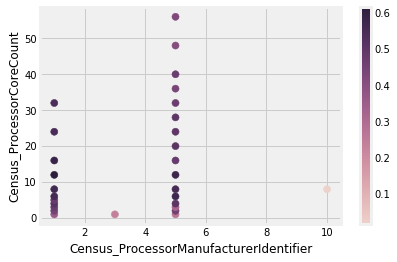

In [129]:
plot_two_categories('Census_ProcessorManufacturerIdentifier','Census_ProcessorCoreCount')

In [155]:
a.head()

,EngineVersion1,AppVersion1,HasDetectionsmean,HasDetectionssize
89,12805,9.10586,0.482143,672
90,12805,10.14393,0.465649,917
92,12805,11.15063,0.300813,123
93,12805,12.16299,0.309446,307
95,12805,13.17134,0.282443,262


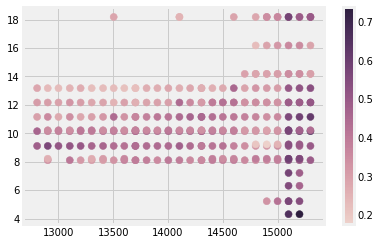

In [156]:
cmap = sns.cubehelix_palette(as_cmap=True)

f, ax = plt.subplots()
points = ax.scatter(a['EngineVersion1'], a['AppVersion1'], c=a['HasDetectionsmean'], s=50, cmap=cmap)
f.colorbar(points)
#sns.lmplot('EngineVersion1','AppVersion1',data=a,fit_reg=False,scatter_kws={"color":a['HasDetectionsmean']*100})

In [33]:
pd.crosstab(train['ProductName'],train['EngineVersion'],margins=False).style.background_gradient(cmap='summer_r')

EngineVersion,9700.0,10302.0,10401.0,10701.0,11104.0,11202.0,11400.0,11502.0,11602.0,11701.0,11804.0,11903.0,12002.0,12101.0,12205.0,12300.0,12400.0,12505.0,12603.0,12706.0,12802.0,12804.0,12805.0,12902.0,13000.0,13102.0,13103.0,13202.0,13301.0,13303.0,13406.0,13407.0,13503.0,13504.0,13601.0,13701.0,13704.0,13802.0,13803.0,13804.0,13902.0,13903.0,14001.0,14002.0,14003.0,14102.0,14103.0,14104.0,14201.0,14202.0,14303.0,14305.0,14306.0,14405.2,14500.2,14500.5,14600.4,14700.3,14700.4,14700.5,14800.1,14800.3,14901.3,14901.4,15000.1,15000.2,15100.1,15200.1,15300.5,15300.6
ProductName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Other,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,1,0,0,0,0,0,0,0,1,0,2,0,3,33,37,4,6
mse,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,22,0,9,15,0,33,0,38,0,36,36,21,37,0,1,54,0,51,0,0,69,0,0,94,0,123,0,50,307,278,0,365,504,11,1,477,8,1380,6,2395,14,3625,39158,44621,13,1011
win8defender,10,3,5,1,1,1,6,8,9,86,4,13,7,70,6,3,36,14,20,18,1,18,2427,5385,4073,4,4431,4681,2,9282,24,8762,2,70609,7138,4972,4856,42,31,9360,71,9600,42,71,14222,63,86,93832,220,15324,267,5045,23771,36062,279,45490,160081,1317,1104,46300,963,135095,1625,210011,2458,261590,3636724,3800409,68699,119278


In [113]:
train_special=train.loc[train['ProductName']!='win8defender',]

In [37]:
len(train_special)

94963

In [251]:
a=train.sample(10)
(a['Date1']-pd.to_datetime('2010-01-01')).dt.days.corr(a['EngineVersion1'])

0.7848730094898416

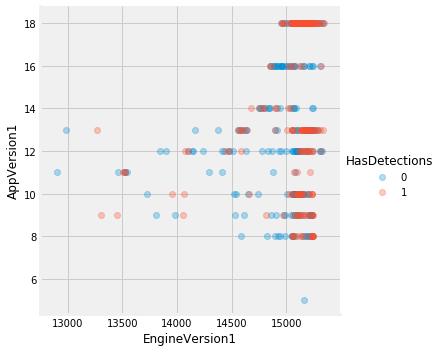

In [53]:
sns.lmplot('EngineVersion1','AppVersion1',hue='HasDetections',data=a,fit_reg=False,scatter_kws={'alpha':0.3},x_jitter=50)
#plt.savefig('appver1+enginever1.png')

In [326]:
train['RtpStateBitfield'].value_counts()#.corr(train['HasDetections'])

SyntaxError: unexpected EOF while parsing (<ipython-input-326-b2e48ec50e89>, line 1)

In [329]:
train['DefaultBrowsersIdentifier'].corr(train['HasDetections'])

-0.0020230579801347437

In [389]:
train.groupby(['EngineVersion']).agg({'HasDetections': ['count', 'mean']})

HasDetections          
                      count      mean
EngineVersion                        
1.1.10302.0               3  0.333333
1.1.10401.0               5  0.600000
1.1.10701.0               1  1.000000
1.1.11104.0               1  1.000000
1.1.11202.0               1  1.000000
1.1.11400.0               6  0.333333
1.1.11502.0               8  0.375000
1.1.11602.0               9  0.666667
1.1.11701.0              86  0.616279
1.1.11804.0               4  0.250000
1.1.11903.0              13  0.615385
1.1.12002.0               7  0.285714
1.1.12101.0              70  0.671429
1.1.12205.0               6  0.333333
1.1.12300.0               3  0.666667
1.1.12400.0              36  0.416667
1.1.12505.0              14  0.285714
1.1.12603.0              20  0.500000
1.1.12706.0              18  0.277778
1.1.12802.0               1  0.000000
1.1.12804.0              18  0.444444
1.1.12805.0            2427  0.408323
1.1.12902.0            5395  0.377386
1.1.13000.0            4095  0.360928
1.1.13102.0               4  0.250000
1.1.13103.0            4440  0.372523
1.1.13202.0            4696  0.364779
1.1.13301.0               2  0.000000
1.1.13303.0            9315  0.341278
1.1.13406.0              24  0.416667
1.1.13407.0            8800  0.362841
1.1.13503.0               2  0.000000
1.1.13504.0           70645  0.436082
1.1.13601.0            7174  0.354056
1.1.13701.0            4993  0.370118
1.1.13704.0            4893  0.367259
1.1.13802.0              42  0.333333
1.1.13803.0              32  0.437500
1.1.13804.0            9414  0.379435
1.1.13902.0              71  0.225352
1.1.13903.0            9651  0.382965
1.1.14001.0              42  0.190476
1.1.14002.0              71  0.366197
1.1.14003.0           14291  0.392625
1.1.14102.0              63  0.222222
1.1.14103.0              86  0.220930
1.1.14104.0           93926  0.439655
1.1.14201.0             220  0.295455
1.1.14202.0           15449  0.410965
1.1.14303.0             267  0.325843
1.1.14305.0            5095  0.419235
1.1.14306.0           24079  0.387516
1.1.14405.2           36341  0.384469
1.1.14500.2             279  0.304659
1.1.14500.5           45855  0.390339
1.1.14600.4          160585  0.437158
1.1.14700.3            1328  0.370482
1.1.14700.4            1105  0.398190
1.1.14700.5           46777  0.324198
1.1.14800.1             971  0.296601
1.1.14800.3          136476  0.309747
1.1.14901.3            1631  0.310239
1.1.14901.4          212408  0.302460
1.1.15000.1            2472  0.294903
1.1.15000.2          265218  0.343804
1.1.15100.1         3675915  0.552693
1.1.15200.1         3845067  0.491732
1.1.15300.5           68716  0.525336
1.1.15300.6          120295  0.492456
1.1.9700.0               10  0.600000

In [ ]:
plt.scatter('EngineVersion1','AppVersion1',hue='HasDetections',data=a,fit_reg=False,scatter_kws={'alpha':0.3})

In [55]:
train.loc[(train['EngineVersion1']>15000)&(train['AppVersion1']<18)&(train['AppVersion1']>12),'HasDetections'].mean()

0.4511253821795152

In [56]:
train.loc[(train['EngineVersion1']>15000)&(train['AppVersion1']<=12),'HasDetections'].mean()

0.5210543710080467

In [58]:
train['IsBeta'].value_counts()

0    8921416
1         67
Name: IsBeta, dtype: int64

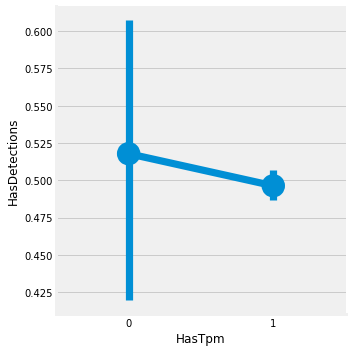

In [60]:
sns.factorplot('HasTpm','HasDetections',data=train.sample(10000))

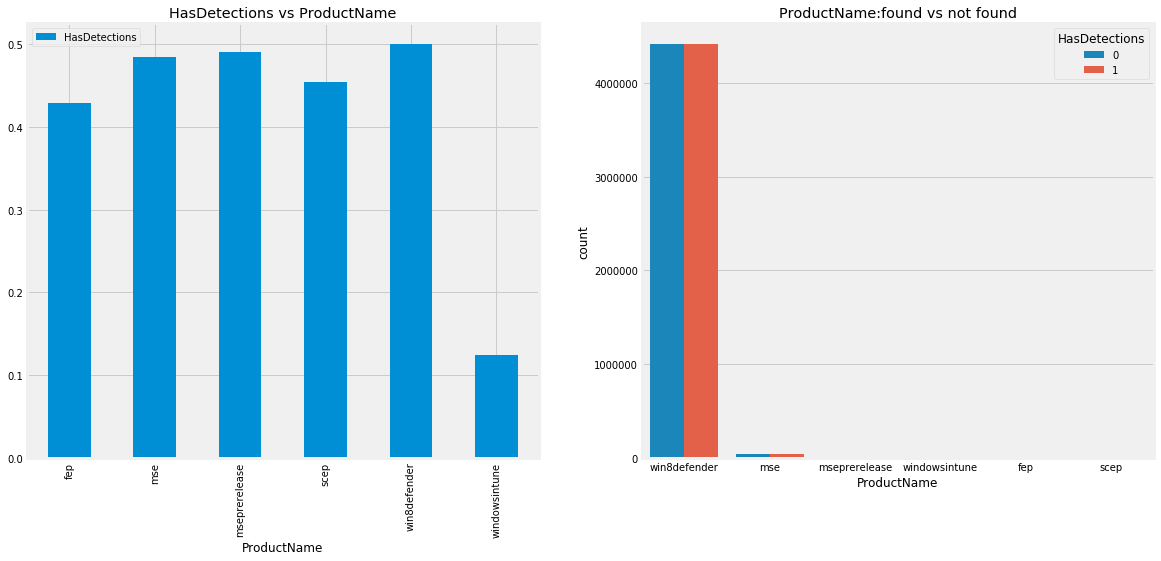

In [391]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['ProductName','HasDetections']].groupby(['ProductName']).mean().plot.bar(ax=ax[0])
ax[0].set_title('HasDetections vs ProductName')
sns.countplot('ProductName',hue='HasDetections',data=train,ax=ax[1])
ax[1].set_title('ProductName:found vs not found')
plt.show()

In [ ]:
train[['ProductName','HasDetections']].groupby(['ProductName']).mean().plot.bar(ax=ax[0])

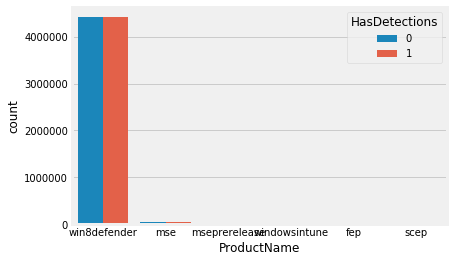

In [396]:
sns.countplot('ProductName',hue='HasDetections',data=train)

In [62]:
train['HasTpm'].value_counts()/len(train)

1    0.987971
0    0.012029
Name: HasTpm, dtype: float64

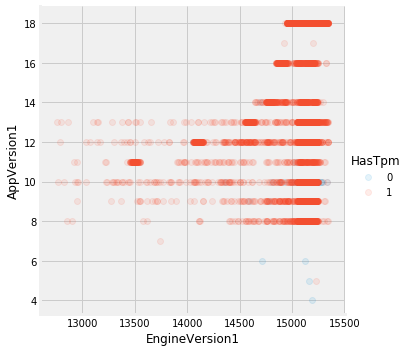

In [72]:
sns.lmplot('EngineVersion1','AppVersion1',hue='HasTpm',data=train.sample(10000),fit_reg=False,scatter_kws={'alpha':0.1},x_jitter=50)

In [74]:
train['Platform'].value_counts()

windows10      8618715
windows8        194508
windows7         93889
windows2016      14371
Name: Platform, dtype: int64

In [76]:
pd.crosstab(train['Platform'],train['OsVer'],margins=False).style.background_gradient(cmap='summer_r')

OsVer,10.0.0.0,10.0.0.1,10.0.0.112,10.0.0.2,10.0.0.22,10.0.0.3,10.0.0.80,10.0.0.96,10.0.1.0,10.0.1.144,10.0.1.44,10.0.153.153,10.0.16.0,10.0.16.36,10.0.19.80,10.0.2.0,10.0.2.86,10.0.21.0,10.0.23.0,10.0.3.0,10.0.3.80,10.0.32.0,10.0.32.72,10.0.4.0,10.0.4.80,10.0.48.0,10.0.5.0,10.0.5.117,10.0.5.18,10.0.6.0,10.0.7.0,10.0.7.101,10.0.8.0,10.0.80.0,6.1.0.0,6.1.0.112,6.1.0.128,6.1.1.0,6.1.16.36,6.1.2.0,6.1.3.0,6.1.4.0,6.1.6.0,6.1.7.0,6.3.0.0,6.3.0.112,6.3.0.117,6.3.0.16,6.3.0.2,6.3.1.0,6.3.1.144,6.3.16.0,6.3.3.0,6.3.32.72,6.3.4.0,6.3.5.0,6.3.7.0,6.3.80.0
Platform,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
windows10,8618174,5,10,1,1,2,1,1,141,1,3,1,9,6,1,30,2,1,1,225,2,2,23,11,1,1,18,1,12,3,15,1,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
windows2016,14371,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
windows7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,582,1,1,93268,1,2,30,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
windows8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,194447,1,1,1,1,22,1,1,24,2,3,2,1,1


In [292]:
pd.Series(train.groupby(['OsVer_total'])['EngineVersion1'].mean().keys()).corr(pd.Series(train.groupby(['OsVer_total'])['EngineVersion1'].mean()))

nan

In [299]:
pd.merge(train.groupby(['OsVer1'])['EngineVersion1'].mean().reset_index(name='mean'),train.groupby(['OsVer1']).size().reset_index(name='count'),on='OsVer1',how='left')

,OsVer1,mean,count
0,6,15080.496926,288397
1,10,15074.476681,8633086


In [284]:
train['OsVer_total']=train['OsVer'].astype(str).str.split(".").apply(lambda x: x[0]).astype(int)+\
                train['OsVer'].astype(str).str.split(".").apply(lambda x: x[1]).astype(int)/10+\
                train['OsVer'].astype(str).str.split(".").apply(lambda x: x[2]).astype(int)/100+\
                train['OsVer'].astype(str).str.split(".").apply(lambda x: x[3]).astype(int)/1000

In [298]:
train['OsVer1']=train['OsVer'].astype(str).str.split(".").apply(lambda x: x[0]).astype(int)
train['OsVer2']=train['OsVer'].astype(str).str.split(".").apply(lambda x: x[1]).astype(int)
train['OsVer3']=train['OsVer'].astype(str).str.split(".").apply(lambda x: x[2]).astype(int)
train['OsVer4']=train['OsVer'].astype(str).str.split(".").apply(lambda x: x[3]).astype(int)

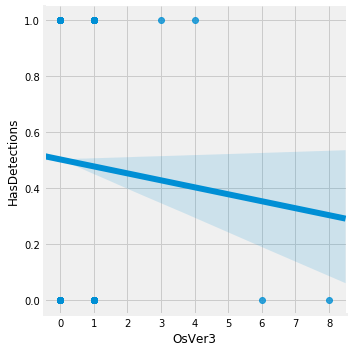

In [123]:
a=train.sample(100000)
sns.lmplot('OsVer3','HasDetections',data=a)

In [127]:
train['Platform'].value_counts()

windows10      8618715
windows8        194508
windows7         93889
windows2016      14371
Name: Platform, dtype: int64

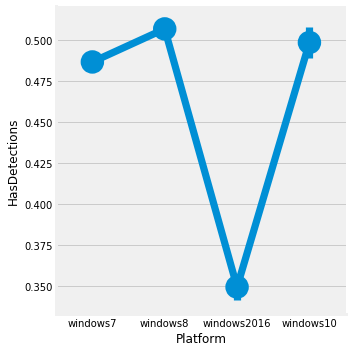

In [134]:
train_special=train.loc[(train['Platform']!='windows10'),]
sns.factorplot('Platform','HasDetections',data=pd.concat([train_special,train.sample(10000)],axis=0))
#plt.savefig('platform.png')

In [148]:
a=train.groupby(['EngineVersion1','AppVersion1'])['HasDetections'].mean().reset_index(name='ratio')
b=train.groupby(['EngineVersion1','AppVersion1'])['HasDetections'].size().reset_index(name='count')
a=pd.merge(a,b,on=['EngineVersion1','AppVersion1'],how='left')
#sns.lmplot('EngineVersion1','AppVersion1',hue='HasDetections',data=a,fit_reg=False,scatter_kws={'alpha':0.3},x_jitter=50)

In [149]:
pd.set_option('display.max_rows',1000)
a.sort_values(['EngineVersion1','AppVersion1'],ascending=False)

,EngineVersion1,AppVersion1,ratio,count
489,15300,18,0.493004,123563
488,15300,17,0.133333,15
487,15300,16,0.288006,1309
486,15300,15,0.000000,3
485,15300,14,0.296885,1573
484,15300,13,0.534738,35840
483,15300,12,0.534251,15620
482,15300,11,0.614202,4619
481,15300,10,0.504028,3103
480,15300,9,0.495180,1971


In [146]:
a=train.groupby(['EngineVersion1'])['HasDetections'].mean().reset_index(name='ratio')
b=train.groupby(['EngineVersion1'])['HasDetections'].size().reset_index(name='count')
a=pd.merge(a,b,on=['EngineVersion1'],how='left')

In [147]:
pd.set_option('display.max_rows',1000)
a.sort_values('count',ascending=False)

,EngineVersion1,ratio,count
61,15200,0.491732,3845067
60,15100,0.552693,3675915
59,15000,0.343352,267690
58,14901,0.302520,214039
62,15300,0.504410,189011
55,14600,0.437158,160585
57,14800,0.309654,137447
47,14104,0.439655,93926
33,13504,0.436082,70645
56,14700,0.327108,49210


In [150]:
a=train.groupby(['EngineVersion1','AppVersion1','Platform'])['HasDetections'].mean().reset_index(name='ratio')
b=train.groupby(['EngineVersion1','AppVersion1','Platform'])['HasDetections'].size().reset_index(name='count')
a=pd.merge(a,b,on=['EngineVersion1','AppVersion1','Platform'],how='left')

In [151]:
pd.set_option('display.max_rows',1000)
a.sort_values(['EngineVersion1','AppVersion1'],ascending=False)

,EngineVersion1,AppVersion1,Platform,ratio,count
751,15300,18,windows10,0.493201,123473
752,15300,18,windows2016,0.222222,90
750,15300,17,windows10,0.133333,15
748,15300,16,windows10,0.287356,1305
749,15300,16,windows2016,0.500000,4
747,15300,15,windows10,0.000000,3
745,15300,14,windows10,0.297074,1572
746,15300,14,windows2016,0.000000,1
744,15300,13,windows10,0.534738,35840
742,15300,12,windows10,0.534230,15615


In [157]:
train['Processor'].value_counts()

x64      8105435
x86       815702
arm64        346
Name: Processor, dtype: int64

In [161]:
pd.crosstab(train['Platform'],train['ProductName'],margins=False).style.background_gradient(cmap='summer_r')

ProductName,fep,mse,mseprerelease,scep,win8defender,windowsintune
Platform,,,,,,
windows10,0,1036,2,2,8617675,0
windows2016,0,0,0,0,14371,0
windows7,6,93808,51,18,0,6
windows8,1,29,0,2,194474,2


In [215]:
datedict = np.load('AvSigVersionTimestamps.npy')
datedict = datedict[()]

In [216]:
train['Date']=train['AvSigVersion'].map(datedict)
test['Date']=test['AvSigVersion'].map(datedict)

In [217]:
train['Date1']=pd.to_datetime(train['Date'].astype(str).str.slice(0,10))
test['Date1']=pd.to_datetime(test['Date'].astype(str).str.slice(0,10))

In [52]:
import datetime
a=train.sample(100000)
means=[]
mins=a['Date1'].min()
maxs=a['Date1'].max()
for i in range(0,-(mins-maxs).days):
    j=mins+datetime.timedelta(days=i)
    means.append(a.loc[((a['Date1']-j).dt.days<=20)&((a['Date1']-j).dt.days>=-20),"HasDetections"].mean())
#train.sample(10000).groupby(['Date1'])['HasDetections'].mean().plot()
labels=[]
for i in np.arange(0, -(mins-maxs).days, step=100):
    labels.append(str(mins+datetime.timedelta(days=int(i)))[:10])
    
pd.Series(means).plot()
plt.xticks(np.arange(0, -(mins-maxs).days, step=100),labels,rotation='vertical')
plt.savefig('time_series.png',bbox_inches = 'tight')

In [66]:
a=train.groupby(['EngineVersion']).size().reset_index(name='count')
b=train.groupby(['EngineVersion'])['HasDetections'].mean().reset_index(name='mean')
a=pd.merge(a,b,on='EngineVersion',how='left').sort_values('count',ascending=False)

In [67]:
a

,EngineVersion,count,mean
66,1.1.15200.1,3845067,0.491732
65,1.1.15100.1,3675915,0.552693
64,1.1.15000.2,265218,0.343804
62,1.1.14901.4,212408,0.302460
55,1.1.14600.4,160585,0.437158
60,1.1.14800.3,136476,0.309747
68,1.1.15300.6,120295,0.492456
46,1.1.14104.0,93926,0.439655
32,1.1.13504.0,70645,0.436082
67,1.1.15300.5,68716,0.525336


In [335]:
train['AvSigVersion2']=train['AvSigVersion'].str.split('.').apply(lambda x: x[2])
train['AvSigVersion2']=train['AvSigVersion2'].astype(int)

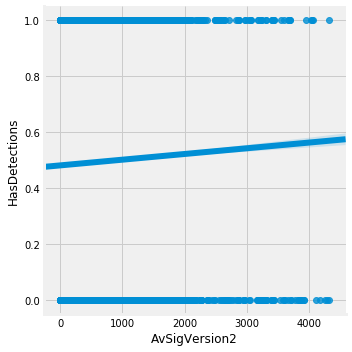

In [336]:
a=train.sample(100000)
sns.lmplot('AvSigVersion2','HasDetections',data=a)

In [348]:
train['AvSigVersion1']=train['AvSigVersion'].str.split('.').apply(lambda x: x[1])
train['AvSigVersion1']=np.where(train['AvSigVersion1']=='2&#x17;3',np.nan,train['AvSigVersion1'])
train['AvSigVersion1']=train['AvSigVersion1'].astype(float)#.astype(int)

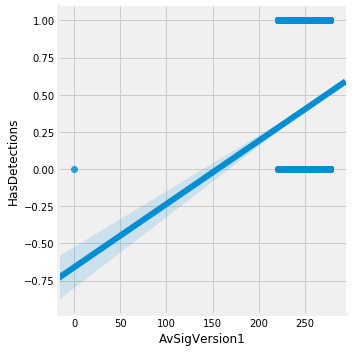

In [354]:
a=train.sample(100000)
sns.lmplot('AvSigVersion1','HasDetections',data=a)

In [356]:
train.groupby(['RtpStateBitfield']).agg({'HasDetections':['mean','size']})

HasDetections         
                          mean     size
RtpStateBitfield                       
0.0                   0.375672   190701
1.0                   0.399385     1625
3.0                   0.299439     3029
5.0                   0.150974    20328
7.0                   0.502980  8651487
8.0                   0.747520    21974
35.0                  0.904762       21

In [357]:
train['RtpStateBitfield'].corr(train['HasDetections'])

0.04148565043481917

In [374]:
train['Census_IsFlightingInternal_isnull'].astype(int).corr(train['SMode_isnull'])

0.008477145700570782

In [369]:
train['Census_IsFlightingInternal_isnull']=train['Census_IsFlightingInternal'].isnull()
train.groupby('Census_IsFlightingInternal_isnull').agg({'HasDetections':['mean','size']})

HasDetections         
                                           mean     size
Census_IsFlightingInternal_isnull                       
False                                  0.487595  1512724
True                                   0.502283  7408759

In [383]:
for i in test.columns:
    if (train[i].isnull().mean()<=0.95) & (train[i].isnull().mean()>=0.05)&(test[i].isnull().mean()<=0.95) & (test[i].isnull().mean()>=0.05):
        train[i+'_isnull']=train[i].isnull()
        test[i+'_isnull']=test[i].isnull()
        print(i)

OrganizationIdentifier
SMode
SmartScreen
Census_InternalBatteryType
Census_IsFlightingInternal
Census_ThresholdOptIn
Census_IsWIMBootEnabled


In [386]:
#train.groupby(['OrganizationIdentifier_isnull']).agg({"HasDetections":['mean','size']})

In [360]:
pd.set_option('display.max_rows',len(train.columns))
train.isnull().mean().sort_values(ascending=False)

PuaMode                                              9.997412e-01
Census_ProcessorClass                                9.958941e-01
DefaultBrowsersIdentifier                            9.514164e-01
Census_IsFlightingInternal                           8.304403e-01
Census_InternalBatteryType                           7.104681e-01
Census_ThresholdOptIn                                6.352447e-01
Census_IsWIMBootEnabled                              6.343904e-01
SmartScreen                                          3.561079e-01
OrganizationIdentifier                               3.084149e-01
SMode                                                6.027686e-02
CityIdentifier                                       3.647477e-02
Wdft_RegionIdentifier                                3.401352e-02
Wdft_IsGamer                                         3.401352e-02
Census_InternalBatteryNumberOfCharges                3.012448e-02
Census_FirmwareManufacturerIdentifier                2.054109e-02
Census_IsF

In [206]:
def get_trend_within_Engine(EngineVersion,sample=10000):
    import datetime
    try:
        a=train.loc[train['EngineVersion']==EngineVersion,].sample(sample)
    except:
        a=train.loc[train['EngineVersion']==EngineVersion,]
    a=a.loc[a['Date1']>="2015-01-01",]
    means=[]
    mins=a['Date1'].min()
    maxs=a['Date1'].max()
    for i in range(0,-(mins-maxs).days):
        j=mins+datetime.timedelta(days=i)
        means.append(a.loc[((a['Date1']-j).dt.days<=10)&((a['Date1']-j).dt.days>=-10),"HasDetections"].mean())

    counts=[]
    for i in range(0,-(mins-maxs).days):
        j=mins+datetime.timedelta(days=i)
        counts.append(len(a.loc[((a['Date1']-j).dt.days<=10)&((a['Date1']-j).dt.days>=-10),]))
    #train.sample(10000).groupby(['Date1'])['HasDetections'].mean().plot()
    labels=[]
    for i in np.arange(0, -(mins-maxs).days, step=10):
        labels.append(str(mins+datetime.timedelta(days=int(i)))[:10])

    pd.Series(means).plot(label='means')
    
    pd.Series(counts/np.max(counts)*((np.max(means))-np.min(means))+np.min(means)).plot(label='counts')
    plt.xticks(np.arange(0, -(mins-maxs).days, step=10),labels,rotation='vertical')
    plt.legend()
    print(np.min(counts))

0


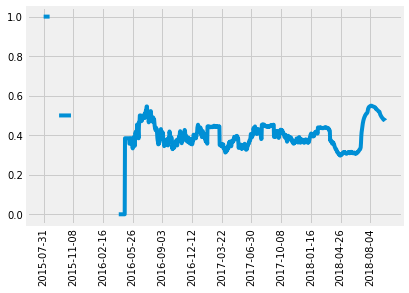

In [235]:
means=[]
a=train.sample(100000)
mins=a['Date1'].min()
maxs=a['Date1'].max()
for i in range(0,-(mins-maxs).days):
    j=mins+datetime.timedelta(days=i)
    means.append(a.loc[((a['Date1']-j).dt.days<=20)&((a['Date1']-j).dt.days>=-20),"HasDetections"].mean())

#train.sample(10000).groupby(['Date1'])['HasDetections'].mean().plot()
labels=[]
for i in np.arange(0, -(mins-maxs).days, step=100):
    labels.append(str(mins+datetime.timedelta(days=int(i)))[:10])

pd.Series(means).plot()

plt.xticks(np.arange(0, -(mins-maxs).days, step=100),labels,rotation='vertical')

print(np.min(counts))

In [247]:
train['AvSigVersion'].value_counts().head()

1.273.1420.0    102317
1.263.48.0       98024
1.275.1140.0     97232
1.275.727.0      92448
1.273.371.0      86967
Name: AvSigVersion, dtype: int64

In [248]:
test['AvSigVersion'].value_counts().head()

1.263.48.0     132624
1.277.515.0     80393
1.251.42.0      73723
1.279.102.0     73108
1.279.32.0      67893
Name: AvSigVersion, dtype: int64

0


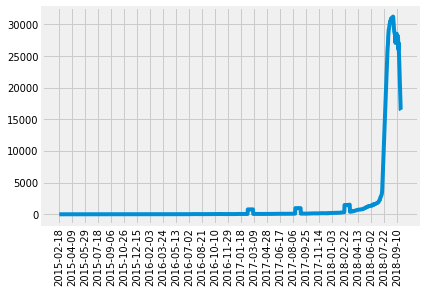

In [243]:
a=train.sample(100000)
mins=a['Date1'].min()
maxs=a['Date1'].max()
counts=[]
for i in range(0,-(mins-maxs).days):
    j=mins+datetime.timedelta(days=i)
    counts.append(len(a.loc[((a['Date1']-j).dt.days<=10)&((a['Date1']-j).dt.days>=-10),]))
    
#train.sample(10000).groupby(['Date1'])['HasDetections'].mean().plot()
labels=[]
for i in np.arange(0, -(mins-maxs).days, step=50):
    labels.append(str(mins+datetime.timedelta(days=int(i)))[:10])

pd.Series(counts).plot()

plt.xticks(np.arange(0, -(mins-maxs).days, step=50),labels,rotation='vertical')

print(np.min(counts))

0


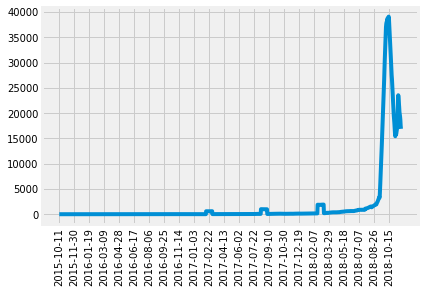

In [244]:
a=test.sample(100000)
mins=a['Date1'].min()
maxs=a['Date1'].max()
counts=[]
for i in range(0,-(mins-maxs).days):
    j=mins+datetime.timedelta(days=i)
    counts.append(len(a.loc[((a['Date1']-j).dt.days<=10)&((a['Date1']-j).dt.days>=-10),]))
    
#train.sample(10000).groupby(['Date1'])['HasDetections'].mean().plot()
labels=[]
for i in np.arange(0, -(mins-maxs).days, step=50):
    labels.append(str(mins+datetime.timedelta(days=int(i)))[:10])

pd.Series(counts).plot()

plt.xticks(np.arange(0, -(mins-maxs).days, step=50),labels,rotation='vertical')

print(np.min(counts))

61


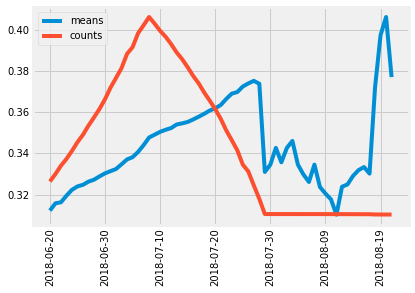

In [208]:
get_trend_within_Engine("1.1.15000.2",100000)

7940


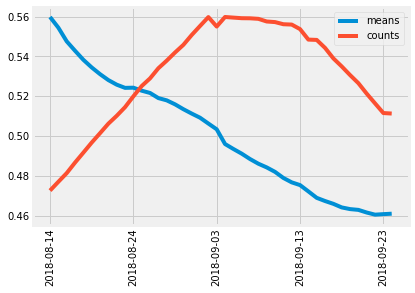

In [170]:
get_trend_within_Engine("1.1.15200.1",100000)

7


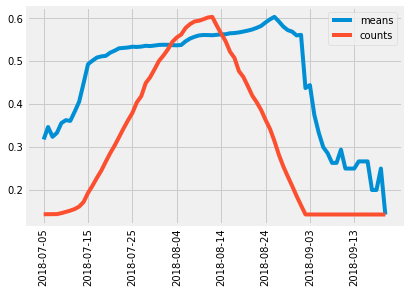

In [171]:
get_trend_within_Engine("1.1.15100.1",100000)

1


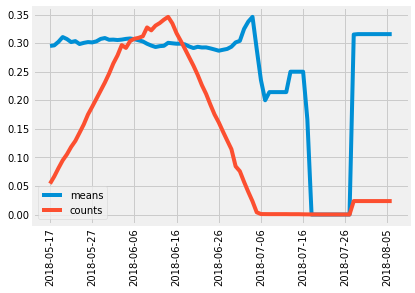

In [172]:
get_trend_within_Engine("1.1.14901.4",10000)

33


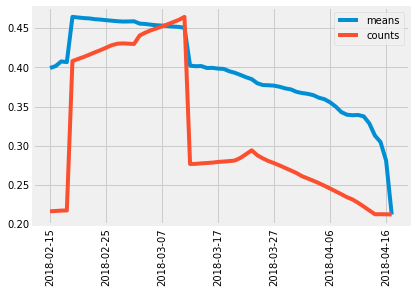

In [174]:
get_trend_within_Engine("1.1.14600.4",100000)

10


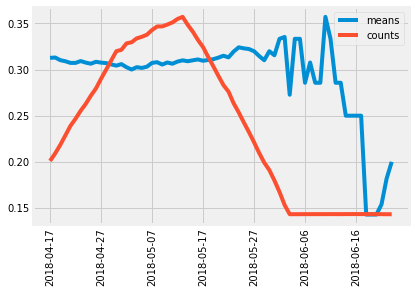

In [187]:
get_trend_within_Engine("1.1.14800.3",10000)

111


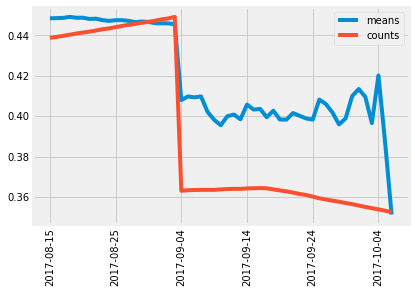

In [185]:
get_trend_within_Engine("1.1.14104.0",10000)

437


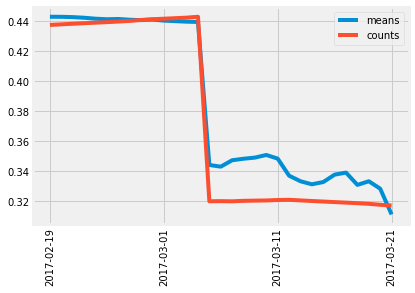

In [184]:
get_trend_within_Engine("1.1.13504.0")

3


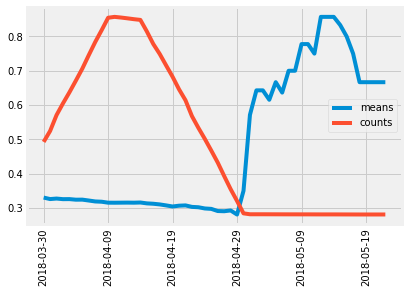

In [183]:
get_trend_within_Engine("1.1.14700.5")

2


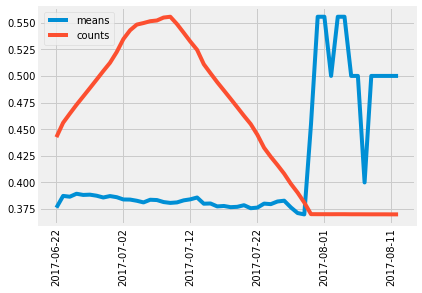

In [189]:
get_trend_within_Engine("1.1.13903.0")

In [219]:
np.arange(mins,maxs,datetime.timedelta(days=365) )

array(['2016-05-20T00:00:00.000000', '2017-05-20T00:00:00.000000',
       '2018-05-20T00:00:00.000000'], dtype='datetime64[us]')

In [181]:
train['Date1'].min()

Timestamp('2013-07-18 00:00:00')

In [178]:
train['Date1'].max()

Timestamp('2018-09-25 00:00:00')

In [145]:
train['HasDetections'].mean()

0.49979269141688665

In [13]:
train.loc[train['ProductName']=='win8defender','EngineVersion'].nunique()

70

In [20]:
train.loc[train['ProductName']=='mseprerelease','EngineVersion'].value_counts()

1.1.15100.1    21
1.1.15200.1    17
1.1.15300.6     5
1.1.15300.5     4
1.1.15000.2     2
1.1.14901.4     1
1.1.14800.3     1
1.1.14202.0     1
1.1.14405.2     1
Name: EngineVersion, dtype: int64

In [23]:
train.loc[train['ProductName']=='fep','EngineVersion'].value_counts()

1.1.15200.1    5
1.1.15100.1    2
Name: EngineVersion, dtype: int64

In [ ]:
pd.crosstab(train['heat_type'],train['heat_fuel'],margins=False).style.background_gradient(cmap='summer_r')